In [2]:
import sys
import importlib
import os
# make the module available from the src directory
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
data_dir = "../datasets/artificial_data/3d_shapes"

def create_list():
    pairs = []
    all_files = os.listdir(data_dir)
    for filename in all_files:
        label = int(filename.split("_").pop().replace(".pt", ""))
        label_dict = { "size": label }
        file_path = os.path.join(data_dir, filename)
        pairs.append({"image": file_path, "label": label_dict})
    return pairs

pairs = create_list()
print(pairs)

[{'image': '../datasets/artificial_data/3d_shapes\\volume_0_label_17.pt', 'label': {'size': 17}}, {'image': '../datasets/artificial_data/3d_shapes\\volume_1000_label_17.pt', 'label': {'size': 17}}, {'image': '../datasets/artificial_data/3d_shapes\\volume_1001_label_16.pt', 'label': {'size': 16}}, {'image': '../datasets/artificial_data/3d_shapes\\volume_1002_label_17.pt', 'label': {'size': 17}}, {'image': '../datasets/artificial_data/3d_shapes\\volume_1003_label_20.pt', 'label': {'size': 20}}, {'image': '../datasets/artificial_data/3d_shapes\\volume_1004_label_18.pt', 'label': {'size': 18}}, {'image': '../datasets/artificial_data/3d_shapes\\volume_1005_label_15.pt', 'label': {'size': 15}}, {'image': '../datasets/artificial_data/3d_shapes\\volume_1006_label_18.pt', 'label': {'size': 18}}, {'image': '../datasets/artificial_data/3d_shapes\\volume_1007_label_23.pt', 'label': {'size': 23}}, {'image': '../datasets/artificial_data/3d_shapes\\volume_1008_label_27.pt', 'label': {'size': 27}}, {'

In [5]:
from src.transformers.TensorLoaderTransfomer import TensorLoader
from monai.transforms import Compose, LoadImaged, EnsureChannelFirstD, ScaleIntensityd, ToTensord, ResizeD, Lambdad, NormalizeIntensityD

from src.transformers.SliceTransformer import SliceAggregateTransform
importlib.reload(sys.modules['src.transformers.SliceTransformer'])

importlib.reload(sys.modules['src.transformers.TensorLoaderTransfomer'])
transforms = [
    TensorLoader(keys=["image"]),
    ResizeD(keys=["image"], spatial_size=(64, 64, 64), mode="area"),
    ScaleIntensityd(keys=["image"], minv=0.0, maxv=1.0, factor=1.0),
    # NormalizeIntensityD(keys=["image"], nonzero=True, channel_wise=True),
    ]

In [6]:
from src.dataLoaders.NiftiDataLoader2 import NiftiDataLoader
importlib.reload(sys.modules['src.dataLoaders.NiftiDataLoader2'])

<module 'src.dataLoaders.NiftiDataLoader2' from 'c:\\Datalogi\\Bachelor\\XAI-in-Medical-Image-Analysis\\src\\dataLoaders\\NiftiDataLoader2.py'>

In [7]:
dataset = 'niftiShort'
data_path = '../datasets/nifti/'
data_dir = f'{data_path}{dataset}'

# data_dir = 'C:/Users/askel/Downloads/NIFTY/NIFTY/'
# max = 8876
dim = 384
data_loader = NiftiDataLoader(data_dir=data_dir, 
                              batch_size=4,
                              spatial_resize=(dim, dim, dim),
                              cache_rate=0.2,
                              replace_rate=0.2,
                              transforms=transforms,
                              data_list=pairs,
                              )
# data_loader.load_data(visit_no=visit, subset_size=2058, cache="standard")
# data_loader.load_data(subset_size=84, cache="standard")z
#data_loader.load_data(subset_size=4400, cache="standard")
# data_loader.load_data(subset_size=8875, cache="standard")

data_loader.load_data(cache="smart", subset_size=1000)

File c:\Datalogi\Bachelor\XAI-in-Medical-Image-Analysis\src\dataLoaders\saved_data_lists\data_list.pkl does not exist.
Data list loaded: False
Using custom sampler: False
Subset size: 1000
Subset data length: 1000
Cache num: 200


Loading dataset:   0%|          | 0/200 [00:00<?, ?it/s]

Loading dataset: 100%|██████████| 100/100 [00:02<00:00, 42.98it/s]

batch_size: 4


In [8]:
from src.models.medical_models.monai_resnet import MonaiMedicalResNet
importlib.reload(sys.modules['src.models.medical_models.monai_resnet'])
importlib.reload(sys.modules['src.models.medical_models.base_medical'])

<module 'src.models.medical_models.base_medical' from 'c:\\Datalogi\\Bachelor\\XAI-in-Medical-Image-Analysis\\src\\models\\medical_models\\base_medical.py'>

In [9]:
fusion_model = MonaiMedicalResNet(
    num_epochs=50,
    learning_rate=0.001,
    weight_decay=1e-4,
    data_loader=data_loader,
    #dropout_rate=0.1,
    depth=18,
    pretrained=False
)

# fusion_model.train()
fusion_model.load_model("MonaiMedicalResNet_18_799_height_torch.Size([4, 1, 64, 64, 64])_epoch_18_val_3.19_r2_0.91.pth")
fusion_model.evaluate()

Data loader train loader:  50 200
Image spatial dimensions:  torch.Size([4, 1, 64, 64, 64])
Number of input channels:  1
Spatial dims:  3
GPU:  cuda:0
Model loaded from c:\Datalogi\Bachelor\XAI-in-Medical-Image-Analysis\src\models\medical_models\saved_models\MonaiMedicalResNet_18_799_height_torch.Size([4, 1, 64, 64, 64])_epoch_18_val_3.19_r2_0.91.pth, epoch: 18, val_loss: 3.191229877740145
R^2 score of the network on the test images: 0.9338845610618591, p-value: 1.1102230246251565e-16
Test Loss: 2.283864126801491


In [21]:
from src.XAI.VanillaSaliencyMedica3D import VanillaSaliency3D
importlib.reload(sys.modules['src.XAI.VanillaSaliencyMedica3D'])

<module 'src.XAI.VanillaSaliencyMedica3D' from 'c:\\Datalogi\\Bachelor\\XAI-in-Medical-Image-Analysis\\src\\XAI\\VanillaSaliencyMedica3D.py'>

{'size': 29}
saliencies.shape (64, 64, 64)
original_images.shape (64, 64, 64)


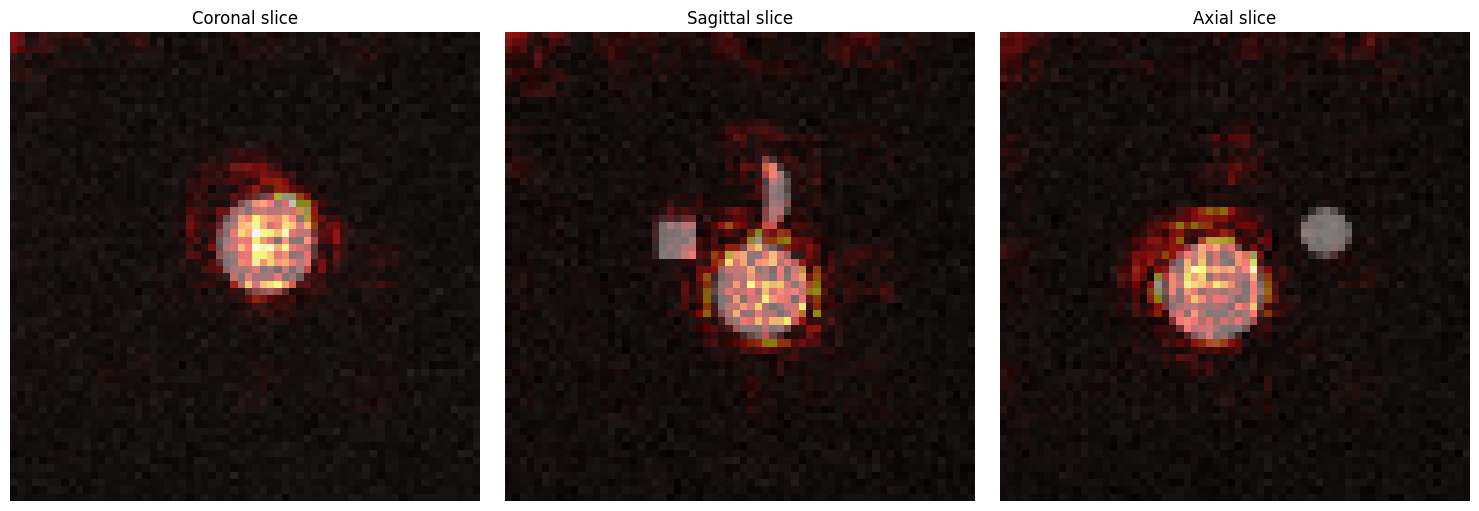

{'size': 29}
saliencies.shape (64, 64, 64)
original_images.shape (64, 64, 64)


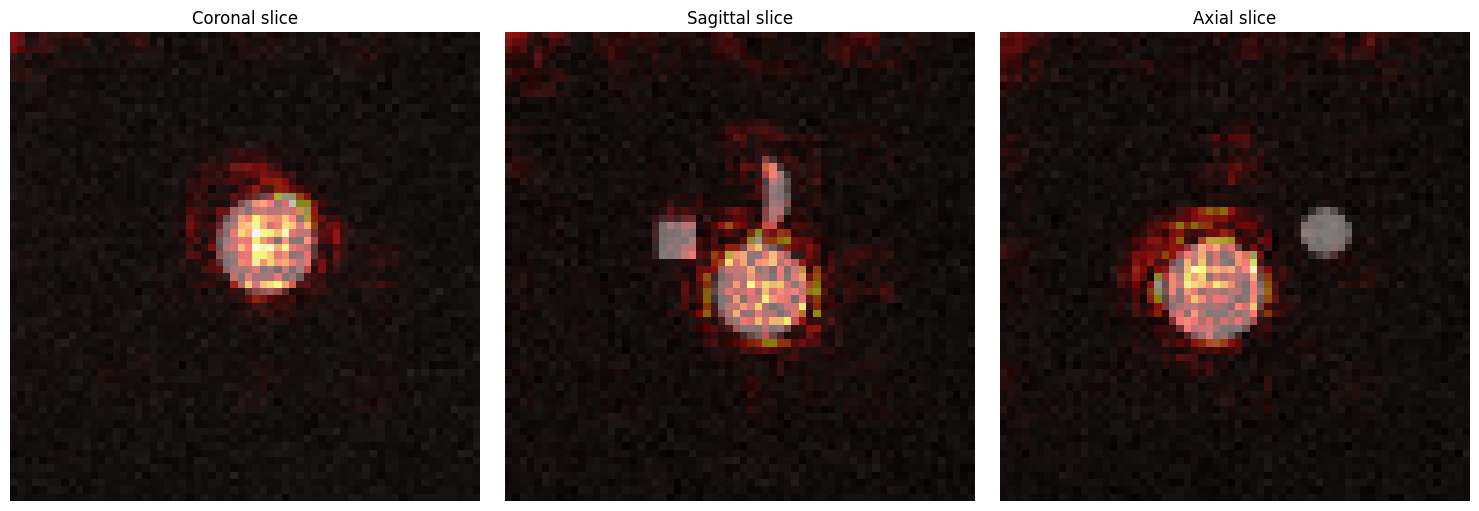

{'size': 15}
saliencies.shape (64, 64, 64)
original_images.shape (64, 64, 64)


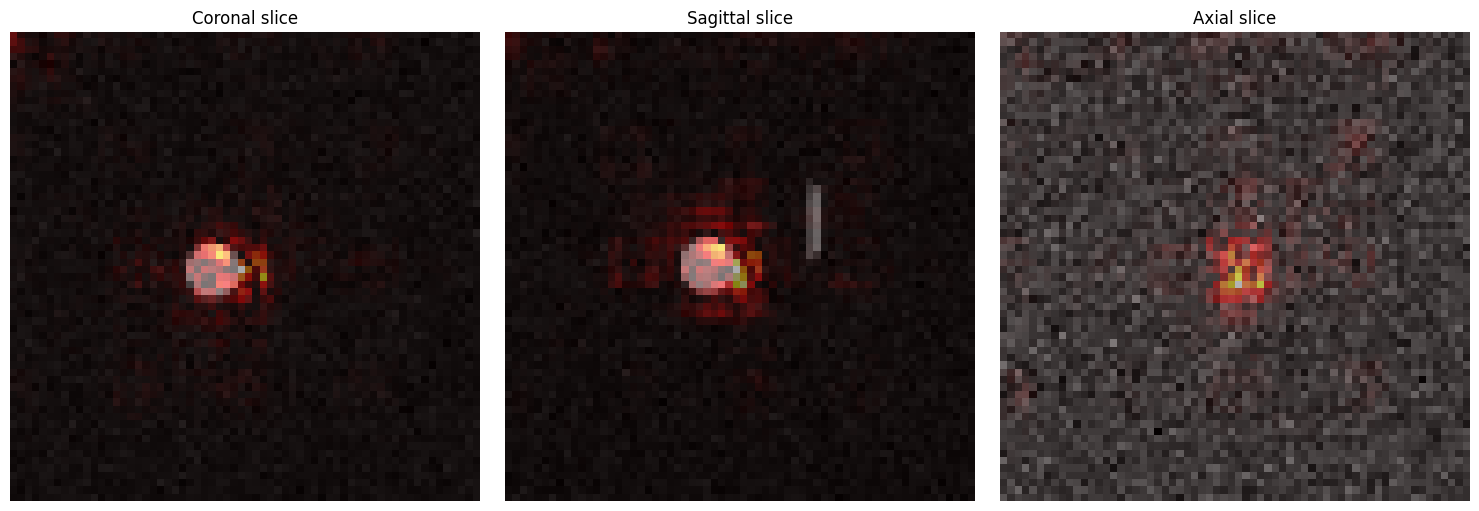

{'size': 12}
saliencies.shape (64, 64, 64)
original_images.shape (64, 64, 64)


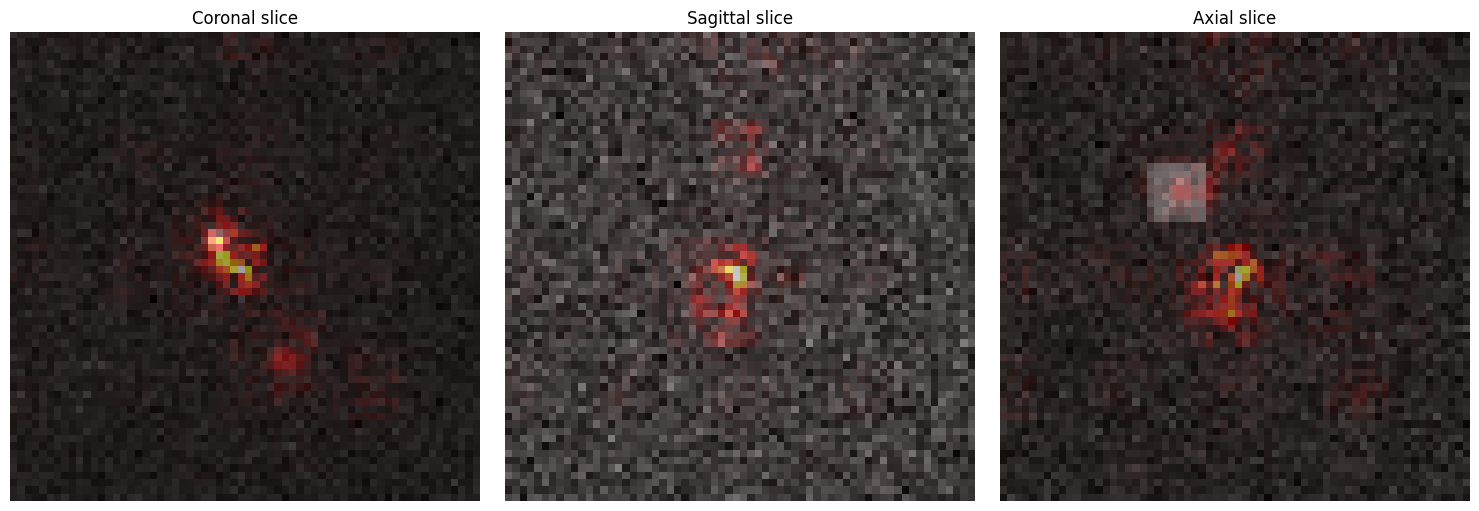

{'size': 15}
saliencies.shape (64, 64, 64)
original_images.shape (64, 64, 64)


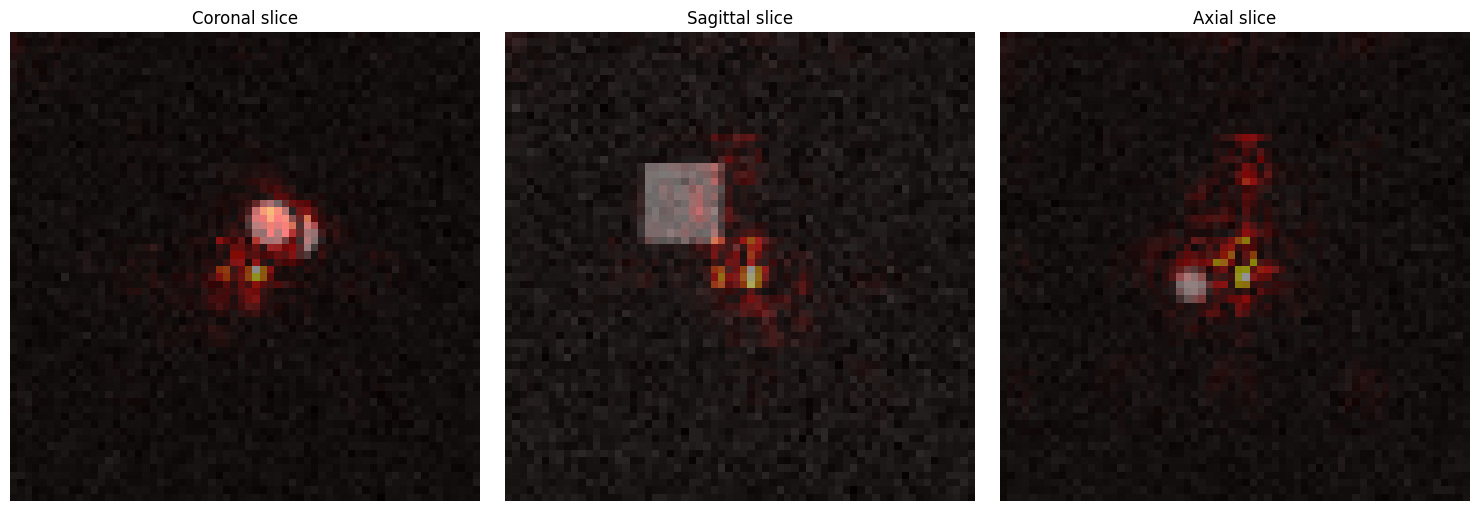

{'size': 25}
saliencies.shape (64, 64, 64)
original_images.shape (64, 64, 64)


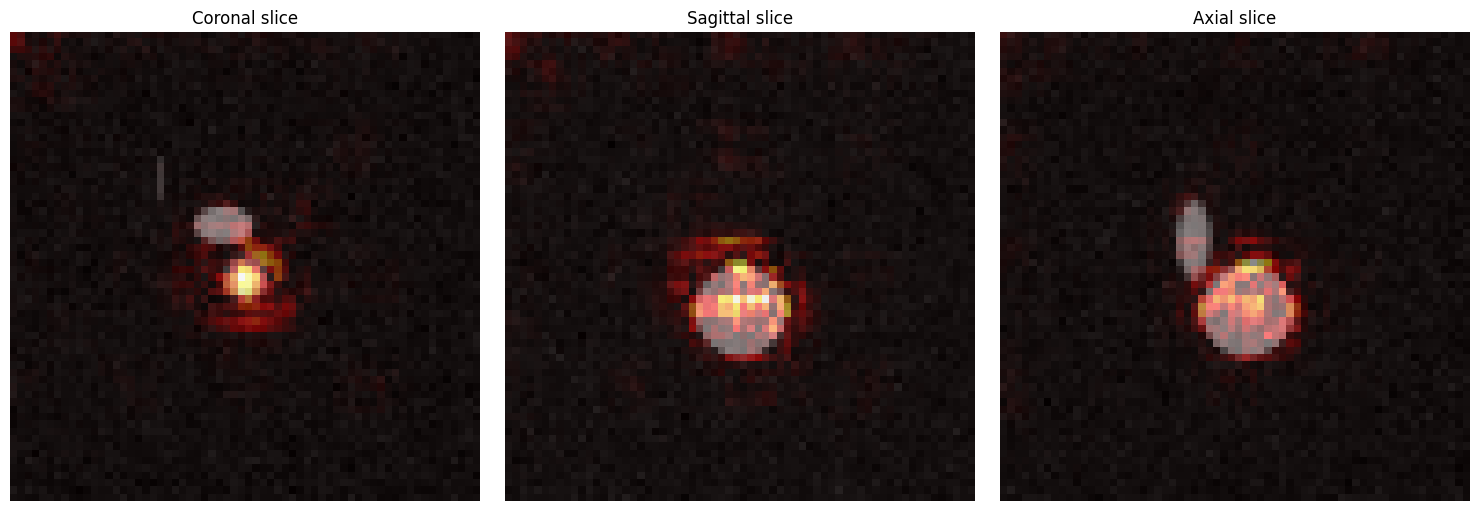

{'size': 25}
saliencies.shape (64, 64, 64)
original_images.shape (64, 64, 64)


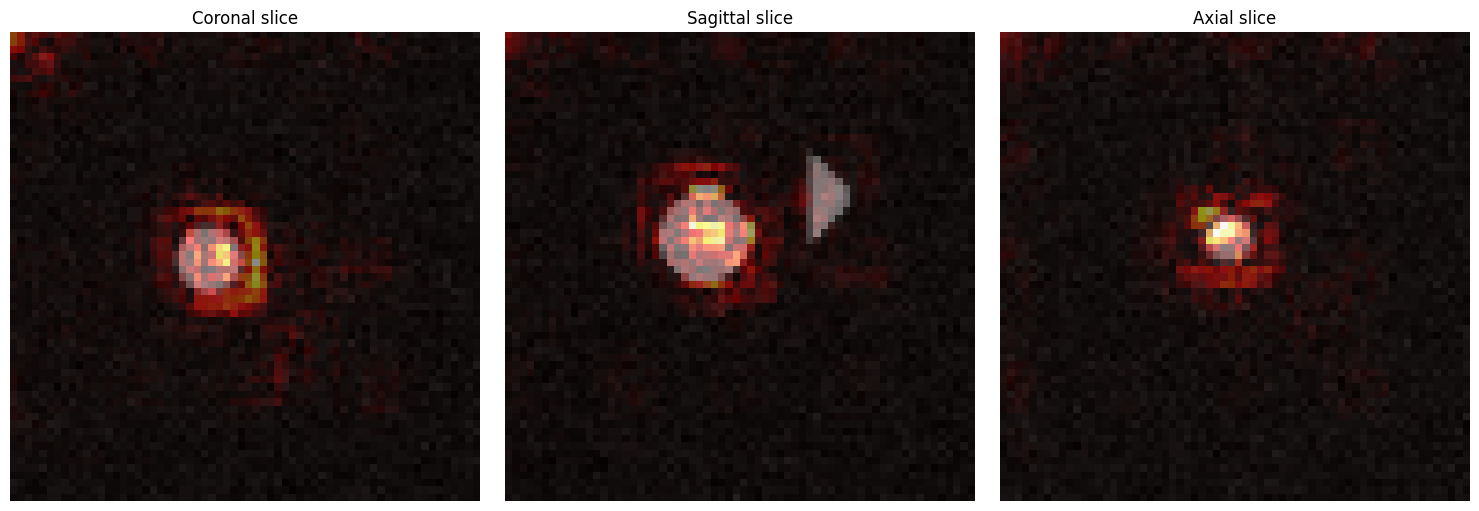

{'size': 23}
saliencies.shape (64, 64, 64)
original_images.shape (64, 64, 64)


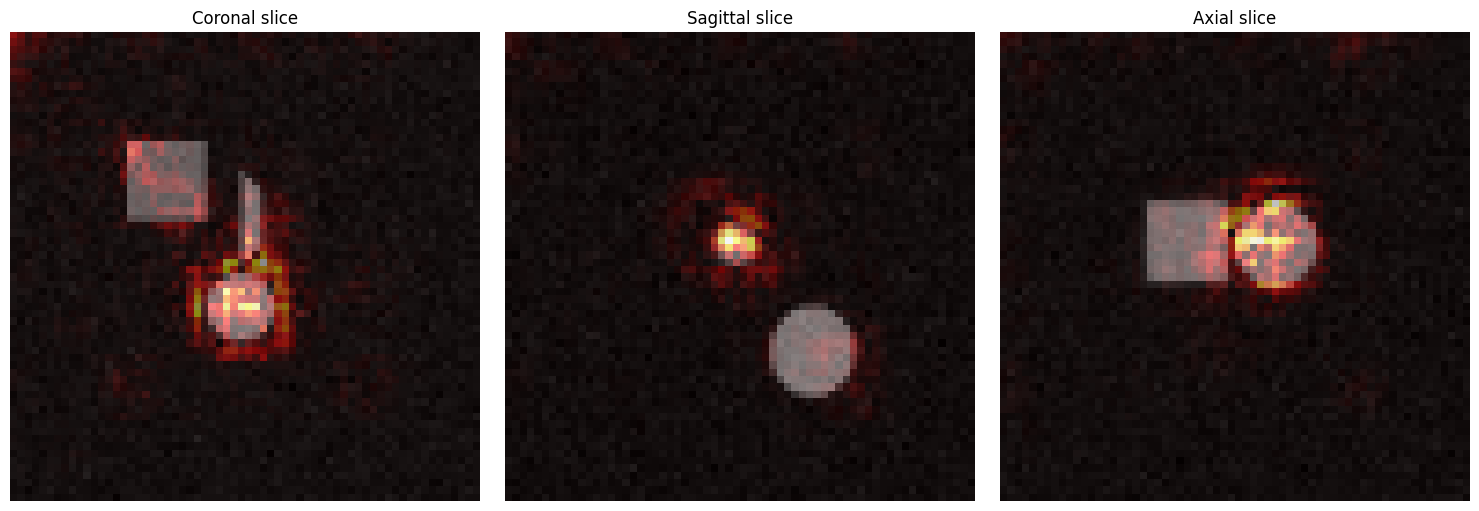

{'size': 20}
saliencies.shape (64, 64, 64)
original_images.shape (64, 64, 64)


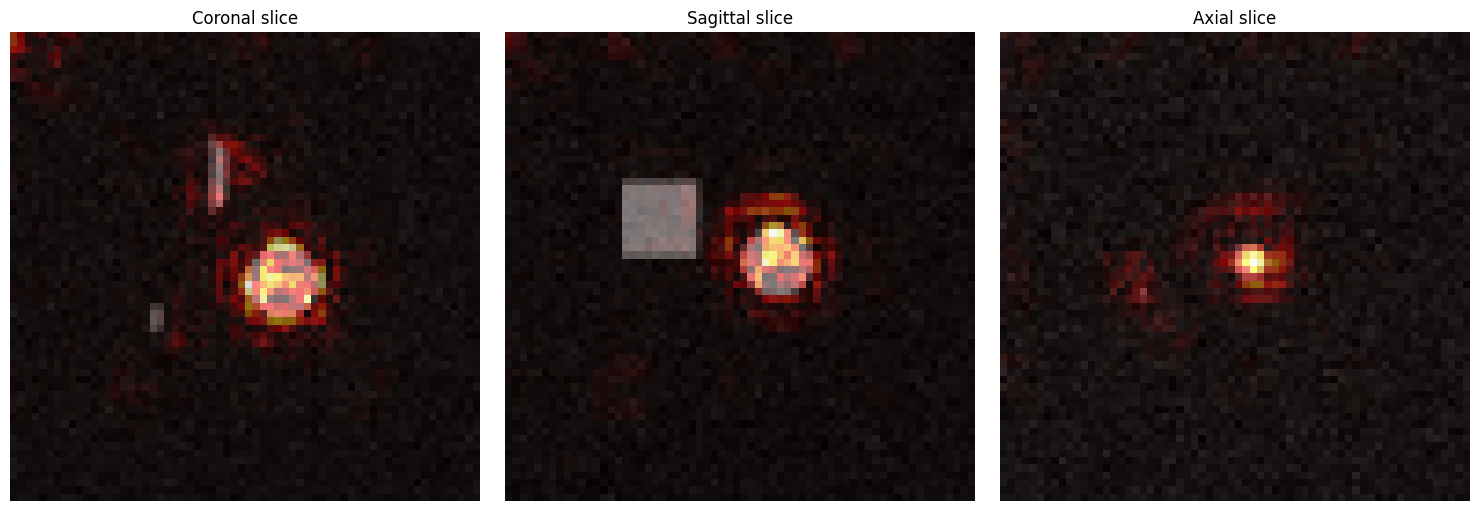

{'size': 15}
saliencies.shape (64, 64, 64)
original_images.shape (64, 64, 64)


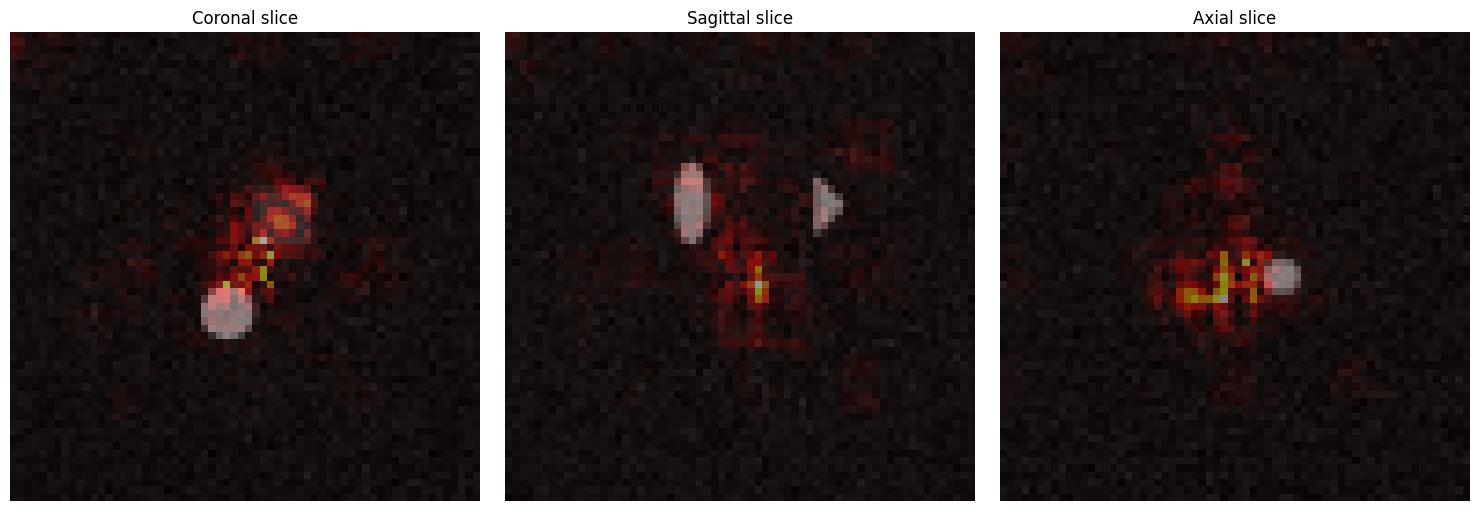

{'size': 28}
saliencies.shape (64, 64, 64)
original_images.shape (64, 64, 64)


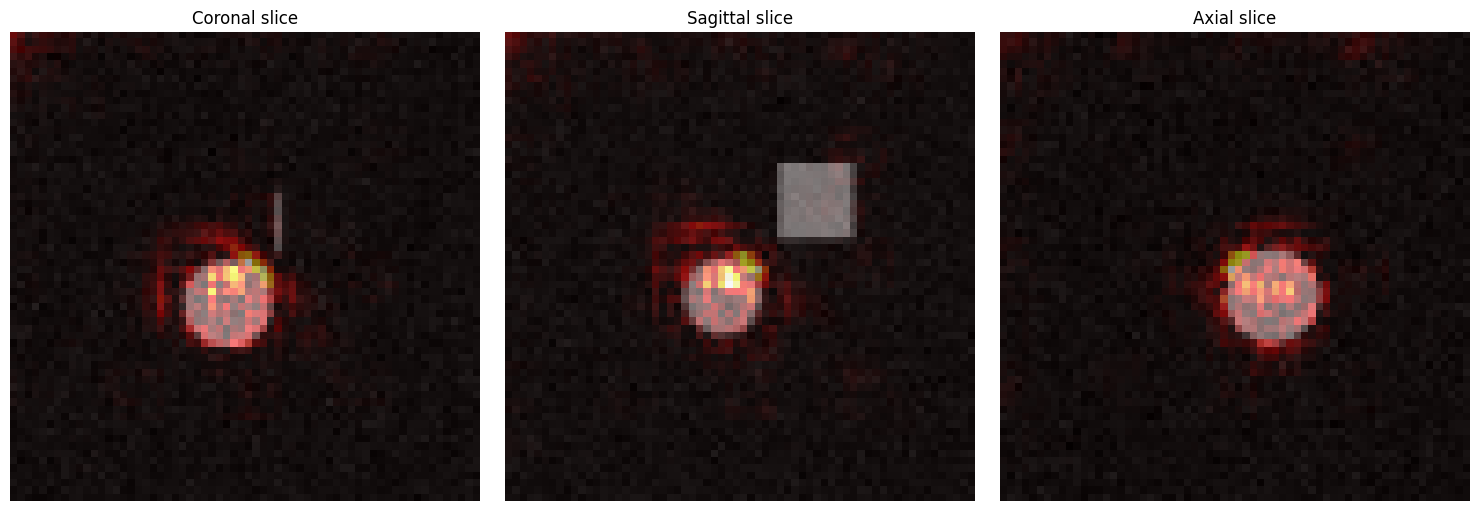

{'size': 20}
saliencies.shape (64, 64, 64)
original_images.shape (64, 64, 64)


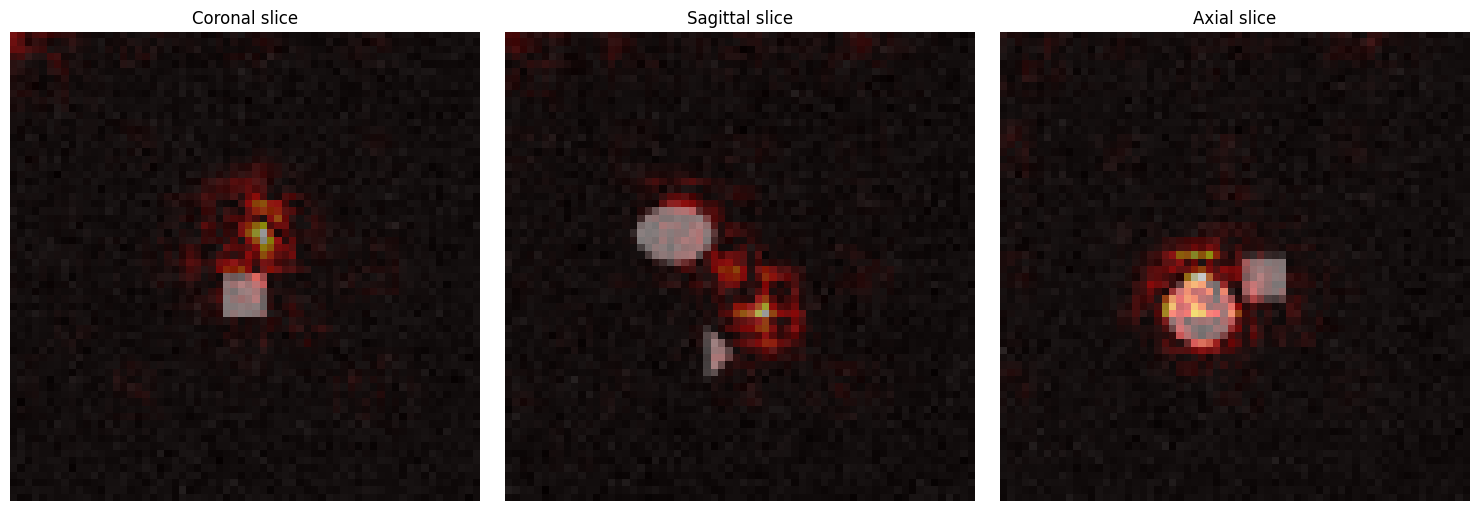

{'size': 17}
saliencies.shape (64, 64, 64)
original_images.shape (64, 64, 64)


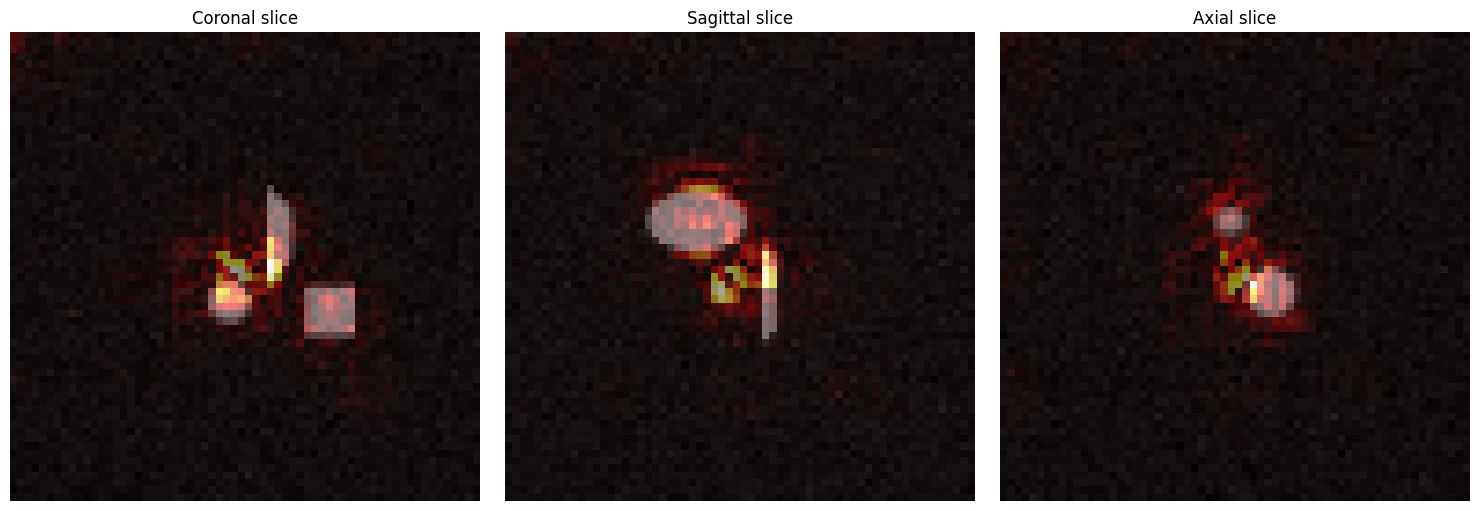

{'size': 12}
saliencies.shape (64, 64, 64)
original_images.shape (64, 64, 64)


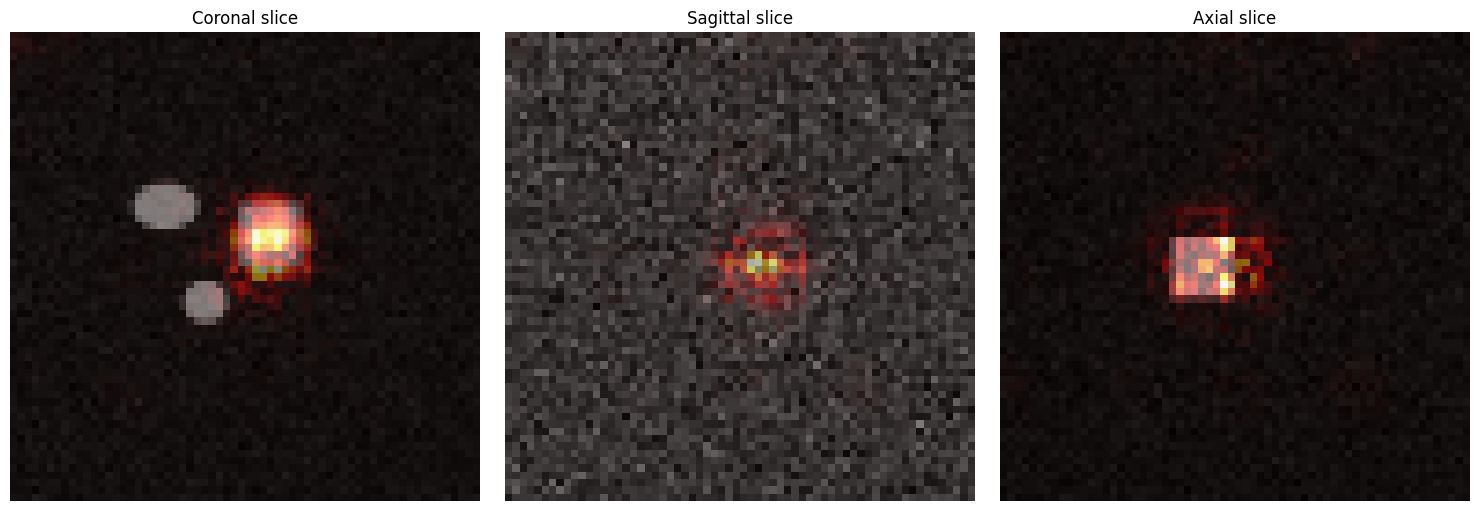

{'size': 10}
saliencies.shape (64, 64, 64)
original_images.shape (64, 64, 64)


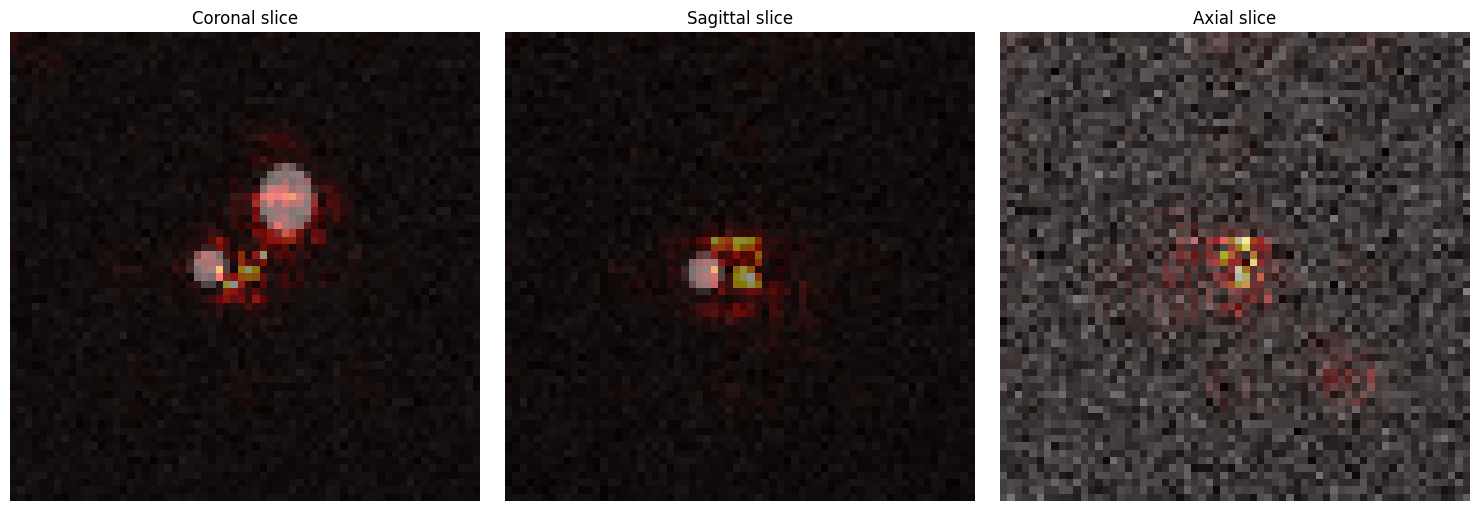

{'size': 29}
saliencies.shape (64, 64, 64)
original_images.shape (64, 64, 64)


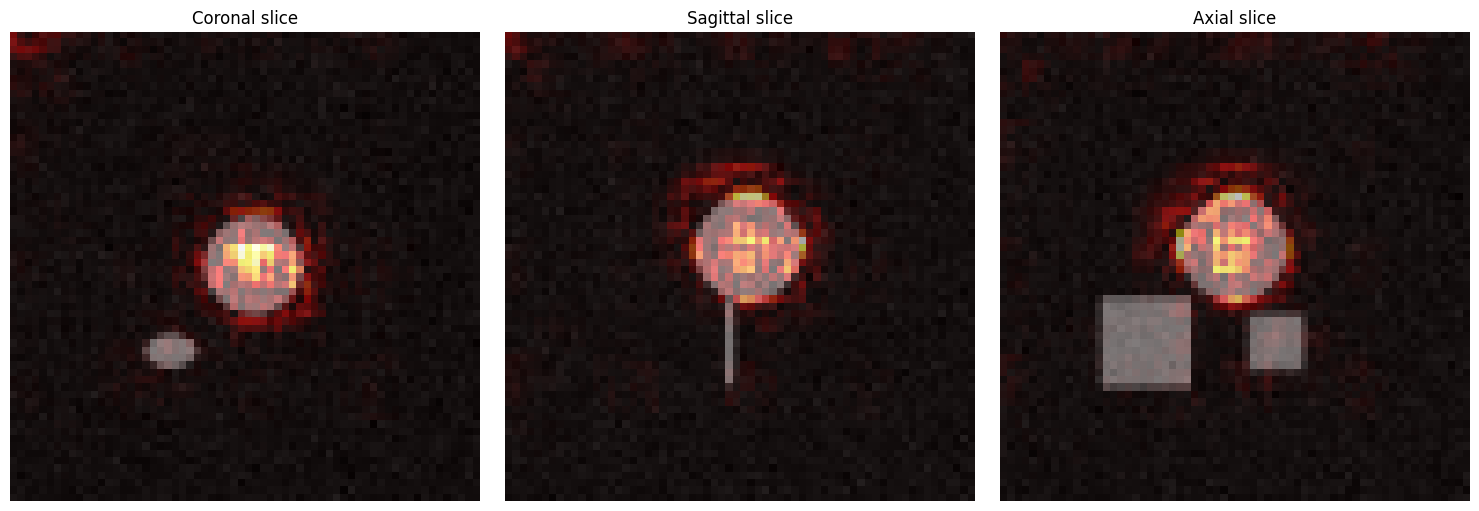

{'size': 17}
saliencies.shape (64, 64, 64)
original_images.shape (64, 64, 64)


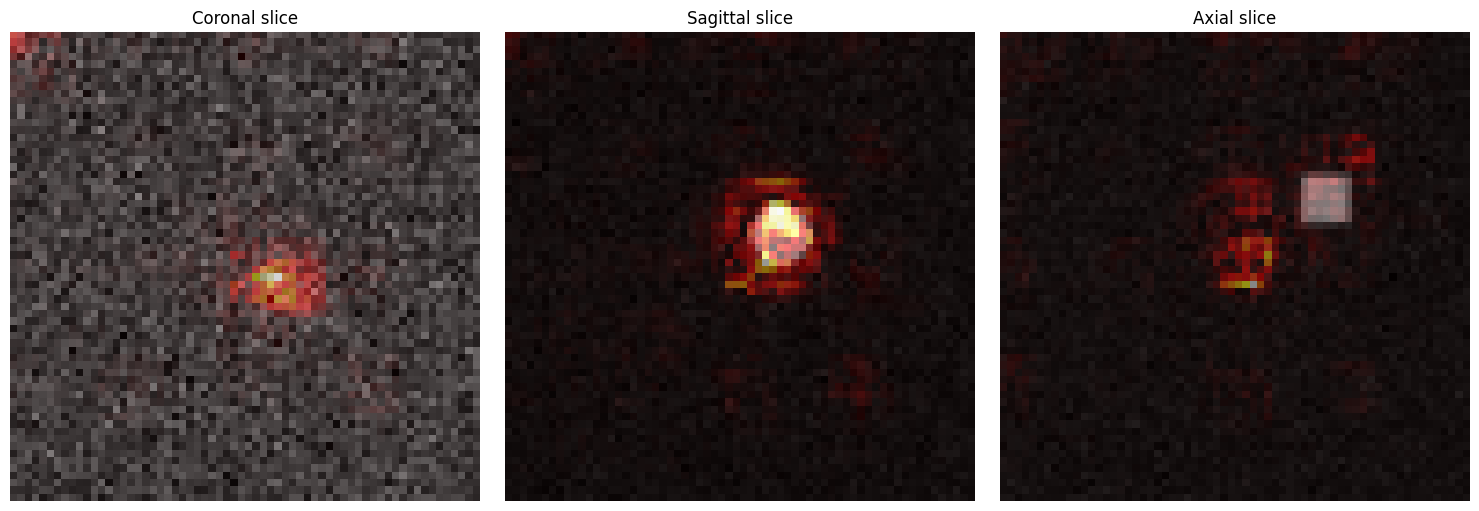

{'size': 21}
saliencies.shape (64, 64, 64)
original_images.shape (64, 64, 64)


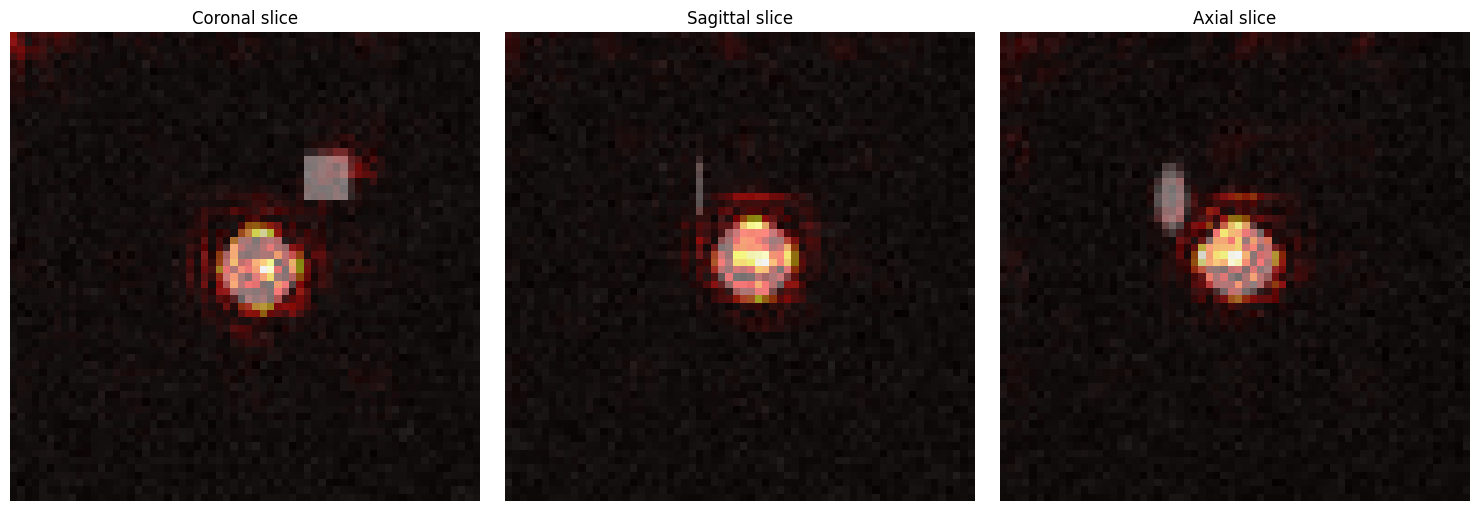

{'size': 29}
saliencies.shape (64, 64, 64)
original_images.shape (64, 64, 64)


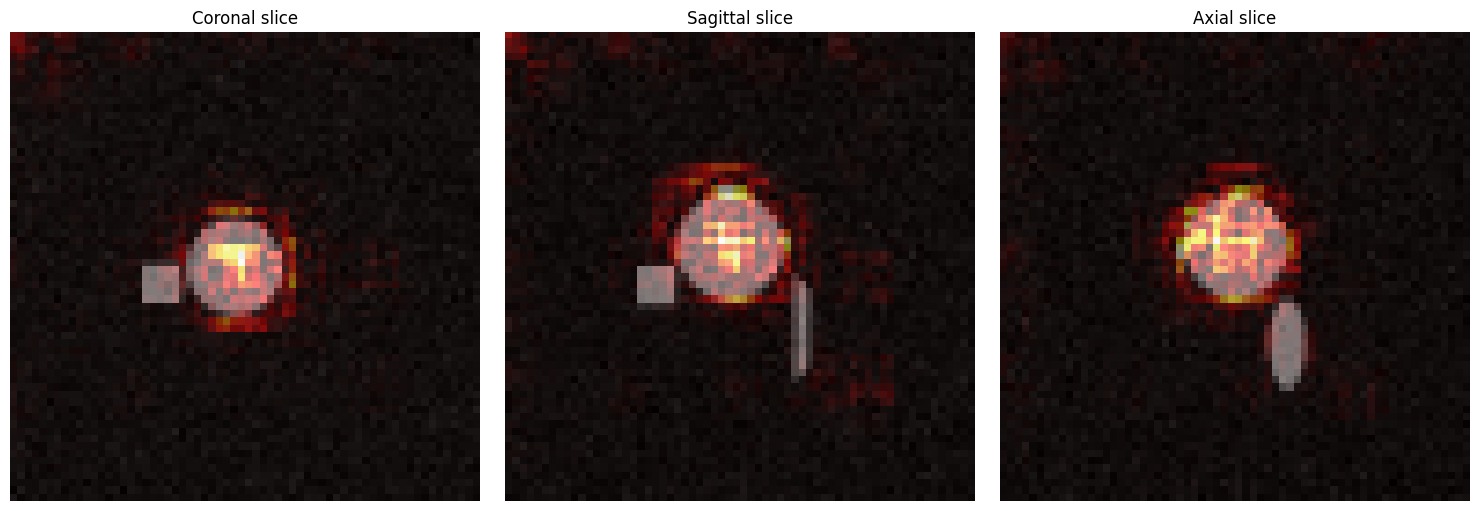

{'size': 15}
saliencies.shape (64, 64, 64)
original_images.shape (64, 64, 64)


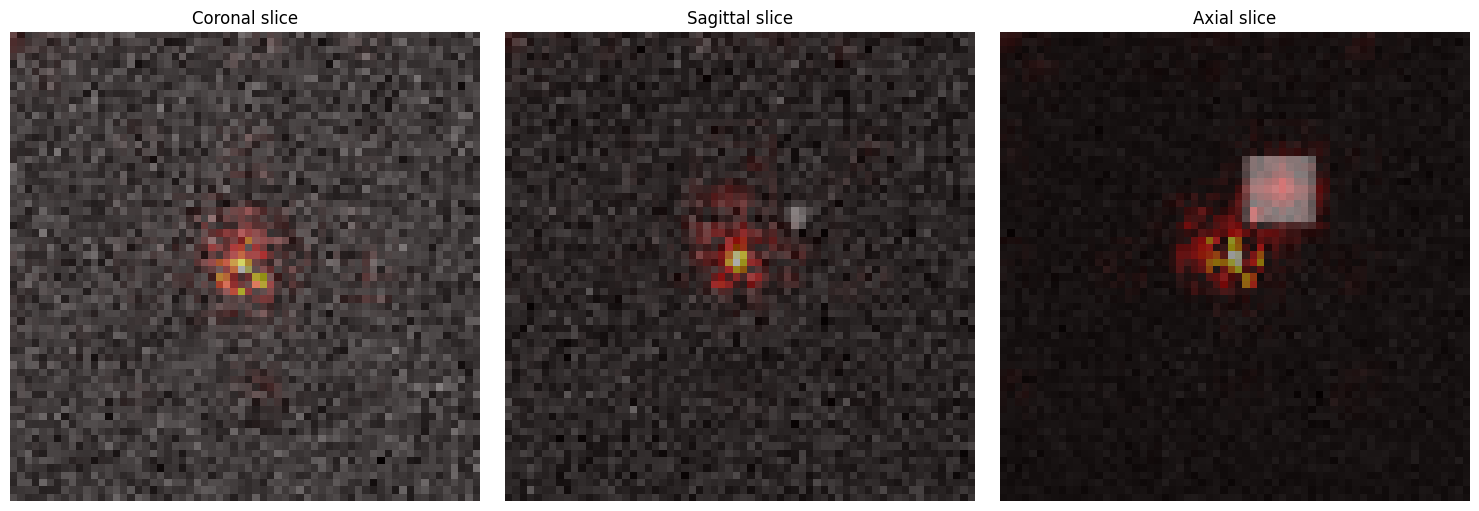

{'size': 17}
saliencies.shape (64, 64, 64)
original_images.shape (64, 64, 64)


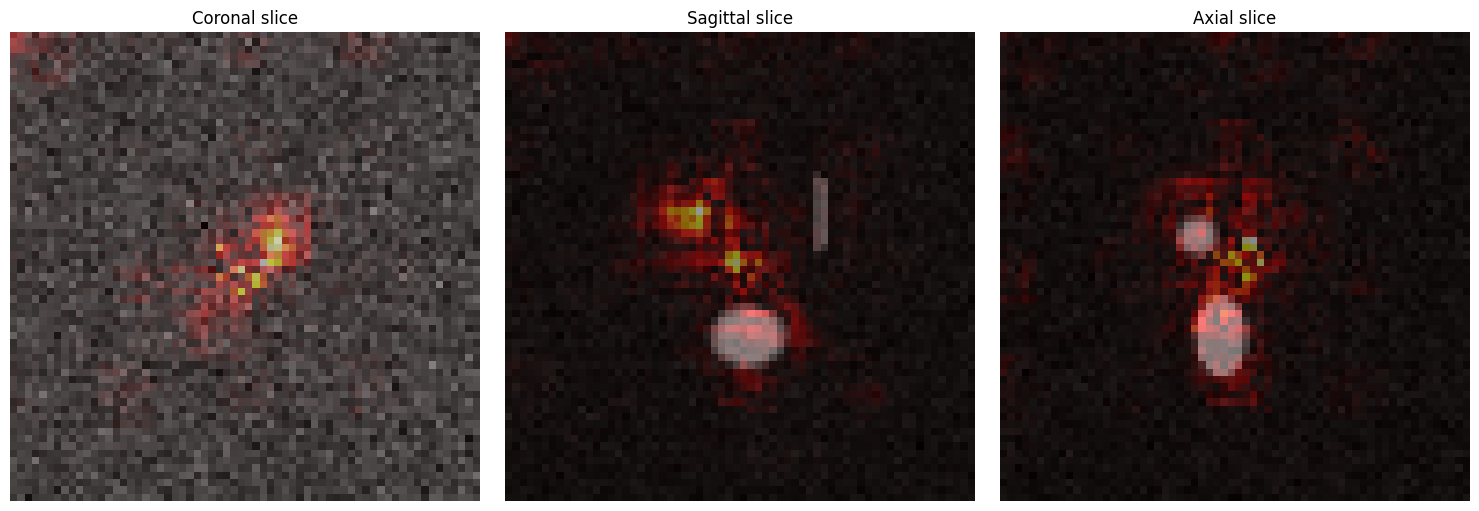

{'size': 28}
saliencies.shape (64, 64, 64)
original_images.shape (64, 64, 64)


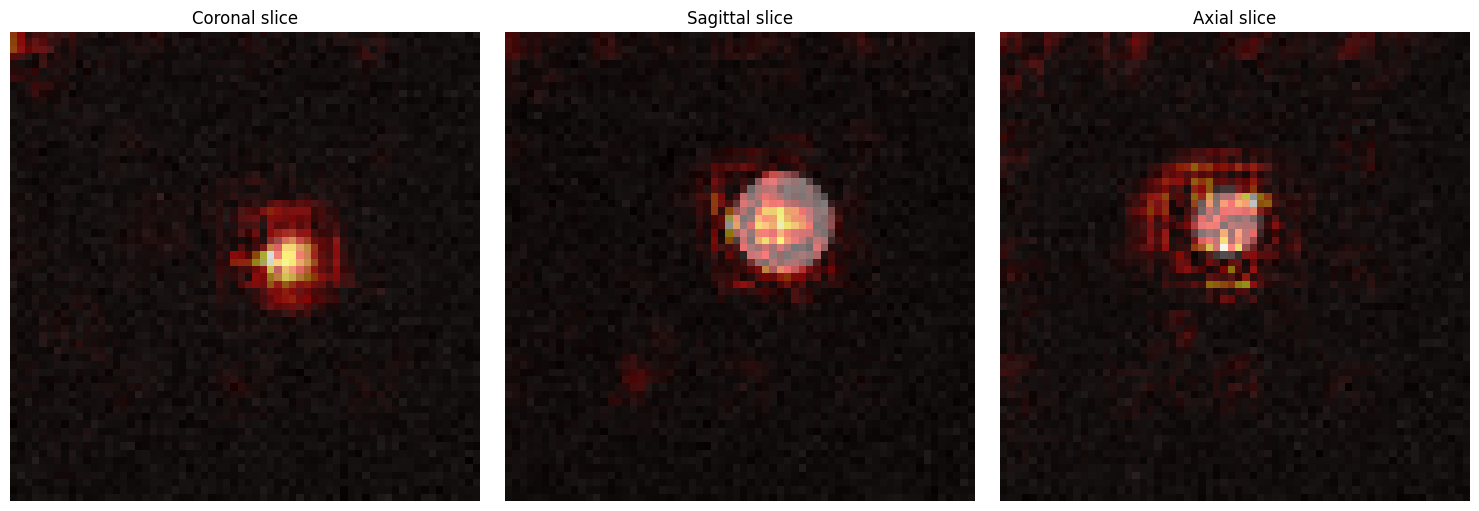

{'size': 27}
saliencies.shape (64, 64, 64)
original_images.shape (64, 64, 64)


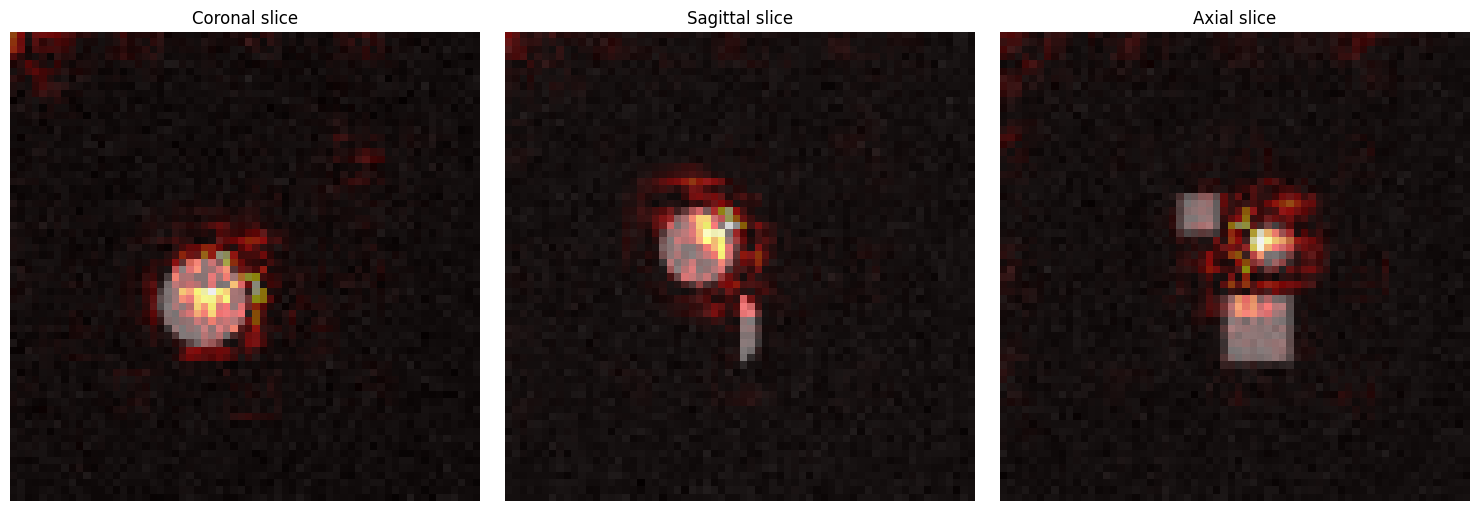

{'size': 23}
saliencies.shape (64, 64, 64)
original_images.shape (64, 64, 64)


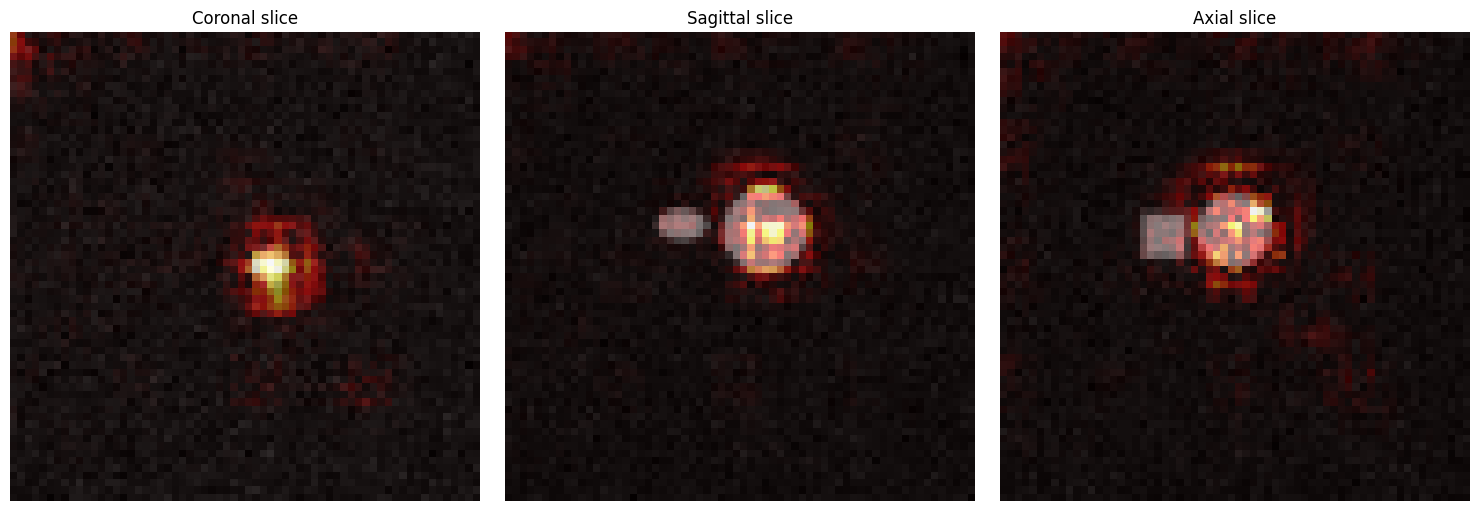

{'size': 28}
saliencies.shape (64, 64, 64)
original_images.shape (64, 64, 64)


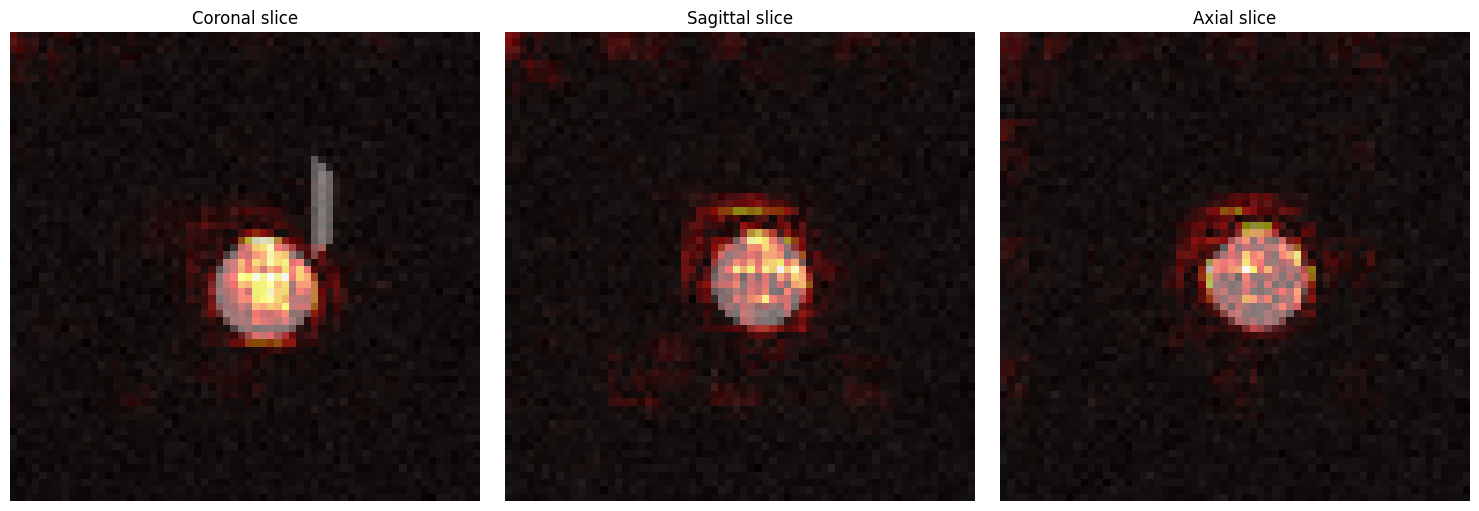

{'size': 16}
saliencies.shape (64, 64, 64)
original_images.shape (64, 64, 64)


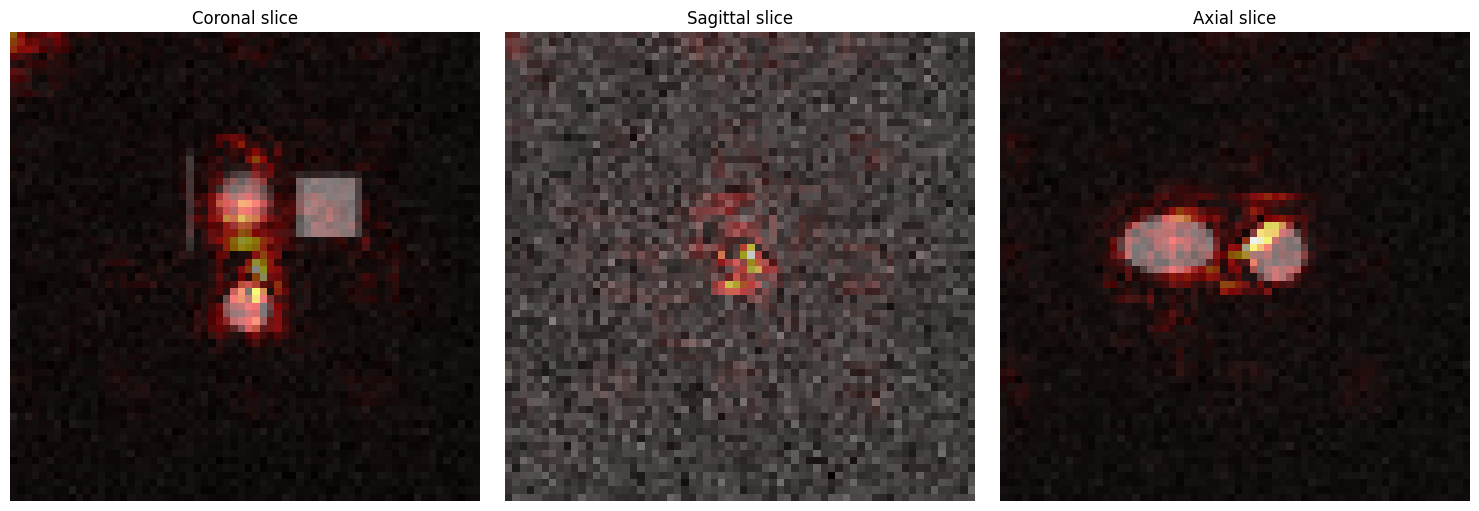

{'size': 22}
saliencies.shape (64, 64, 64)
original_images.shape (64, 64, 64)


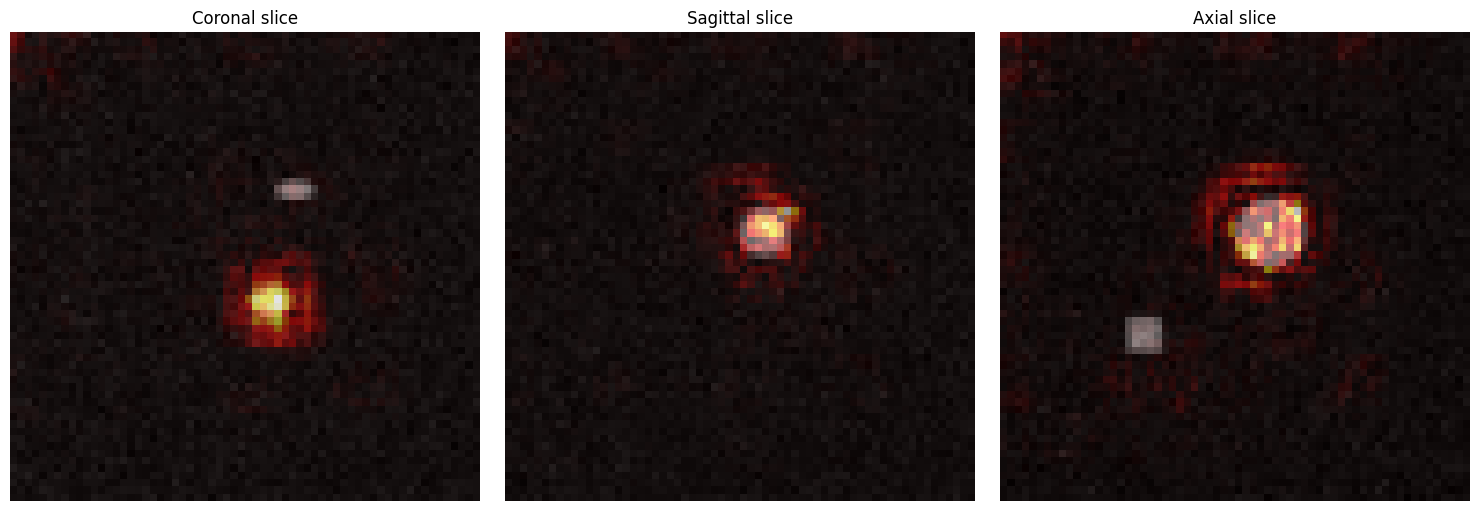

{'size': 21}
saliencies.shape (64, 64, 64)
original_images.shape (64, 64, 64)


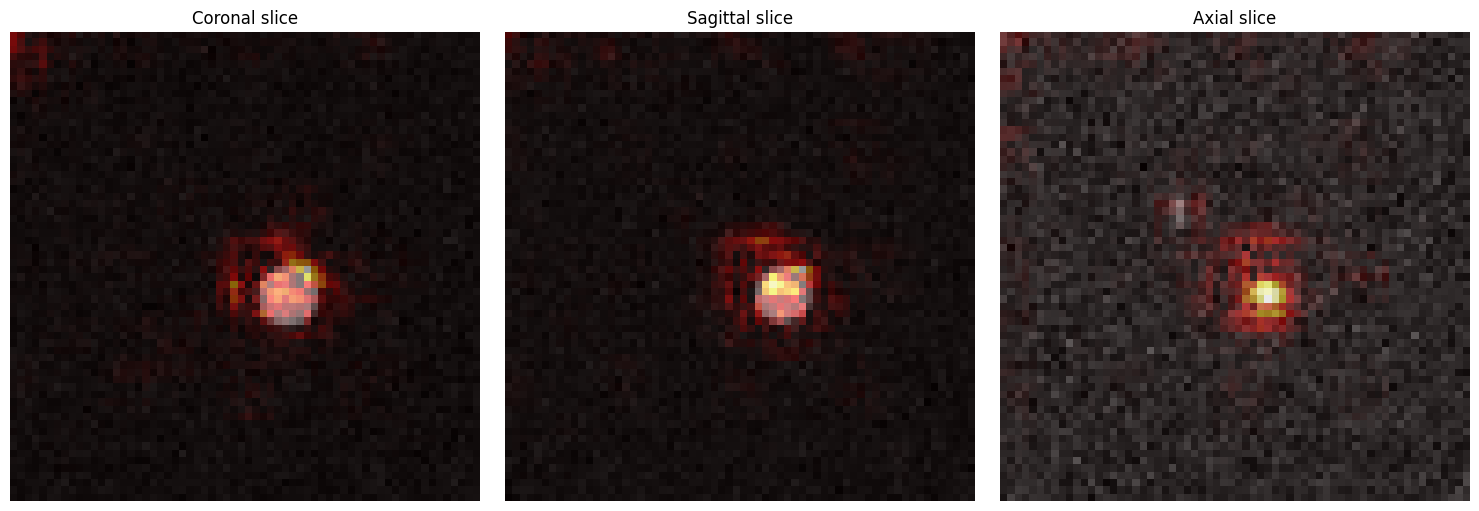

{'size': 16}
saliencies.shape (64, 64, 64)
original_images.shape (64, 64, 64)


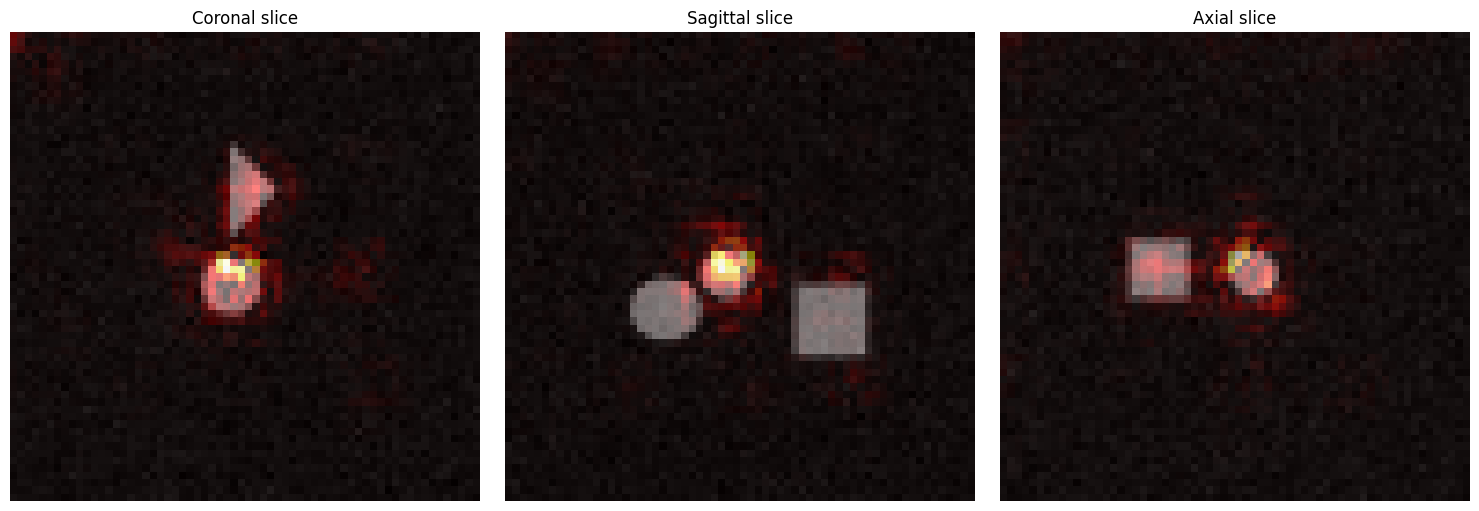

{'size': 28}
saliencies.shape (64, 64, 64)
original_images.shape (64, 64, 64)


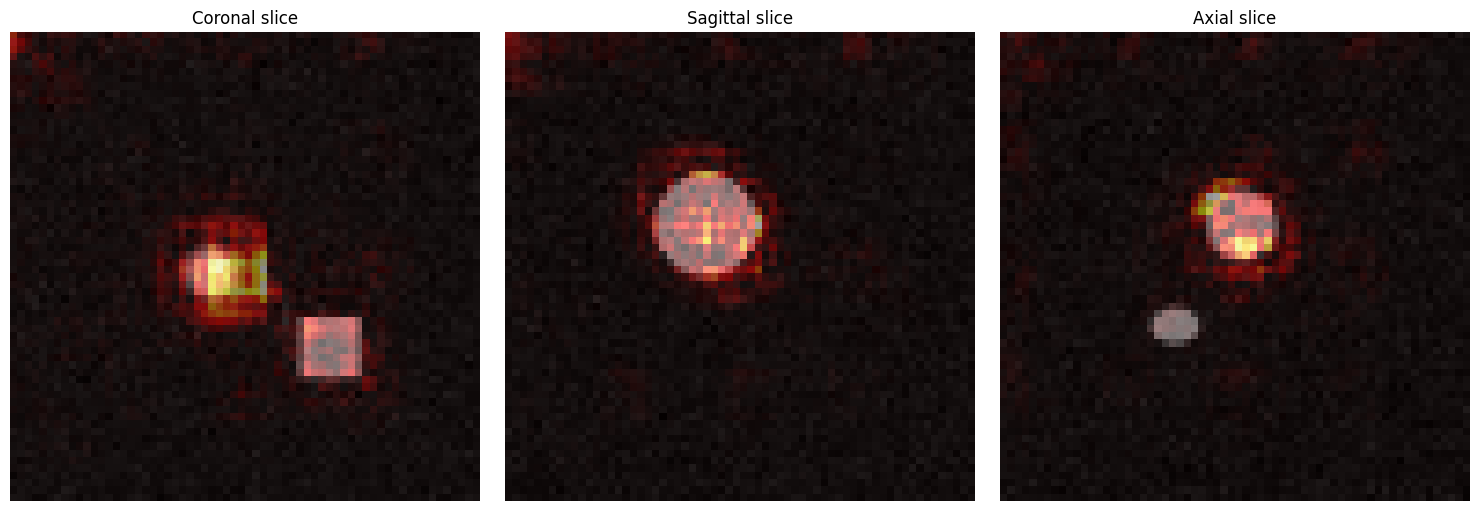

{'size': 25}
saliencies.shape (64, 64, 64)
original_images.shape (64, 64, 64)


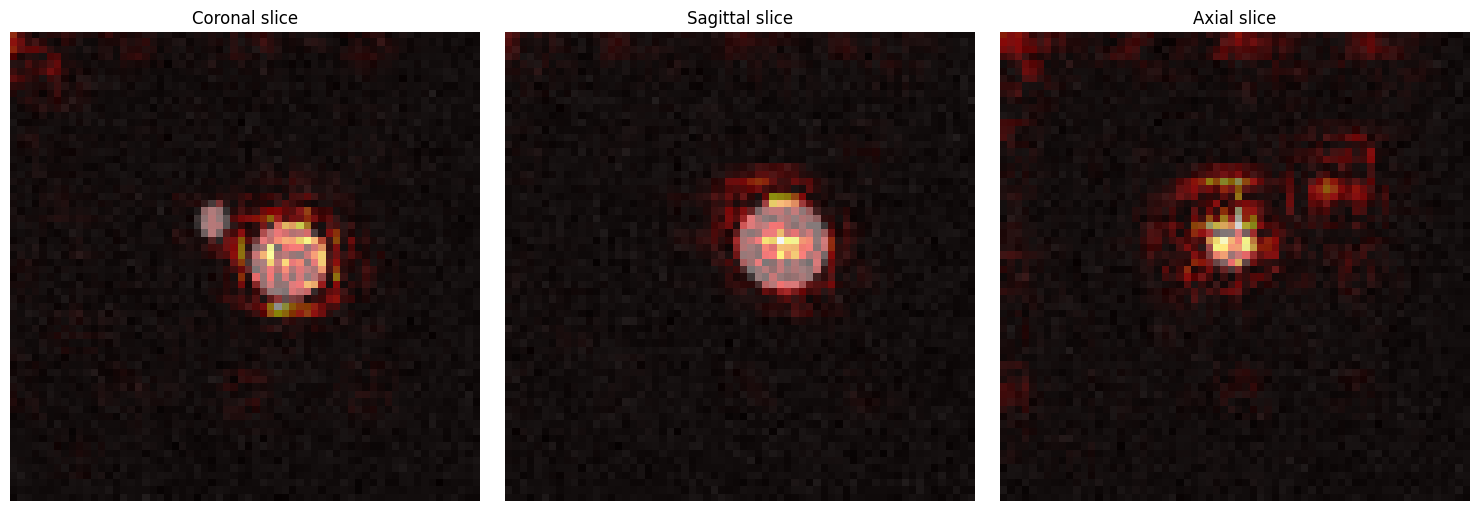

{'size': 10}
saliencies.shape (64, 64, 64)
original_images.shape (64, 64, 64)


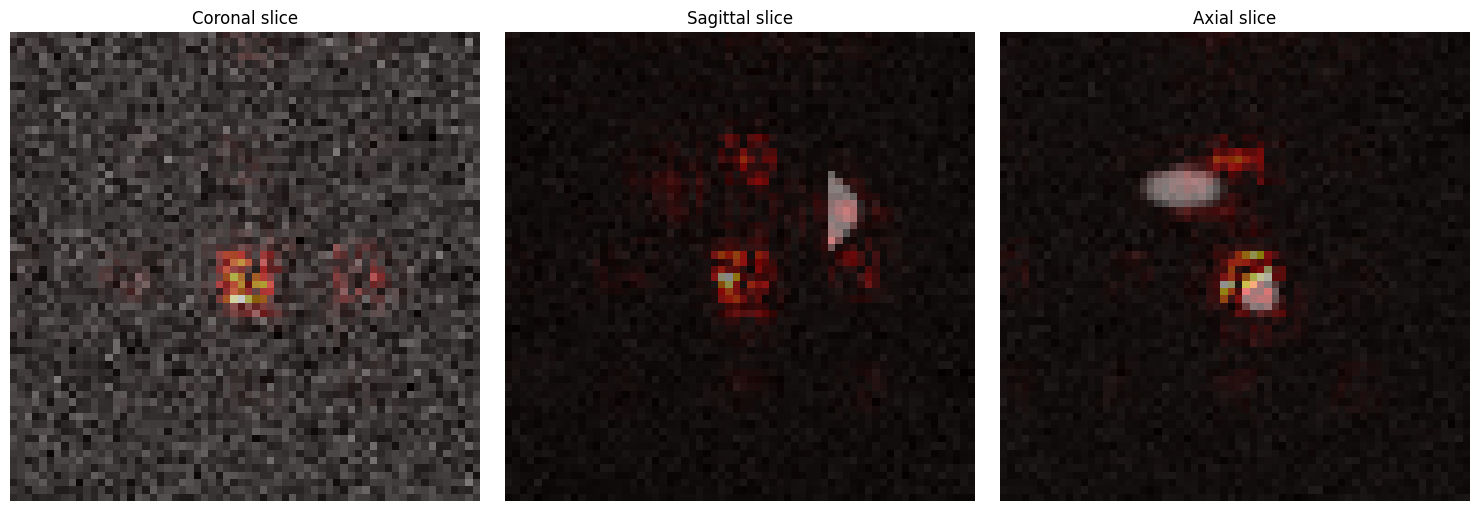

{'size': 27}
saliencies.shape (64, 64, 64)
original_images.shape (64, 64, 64)


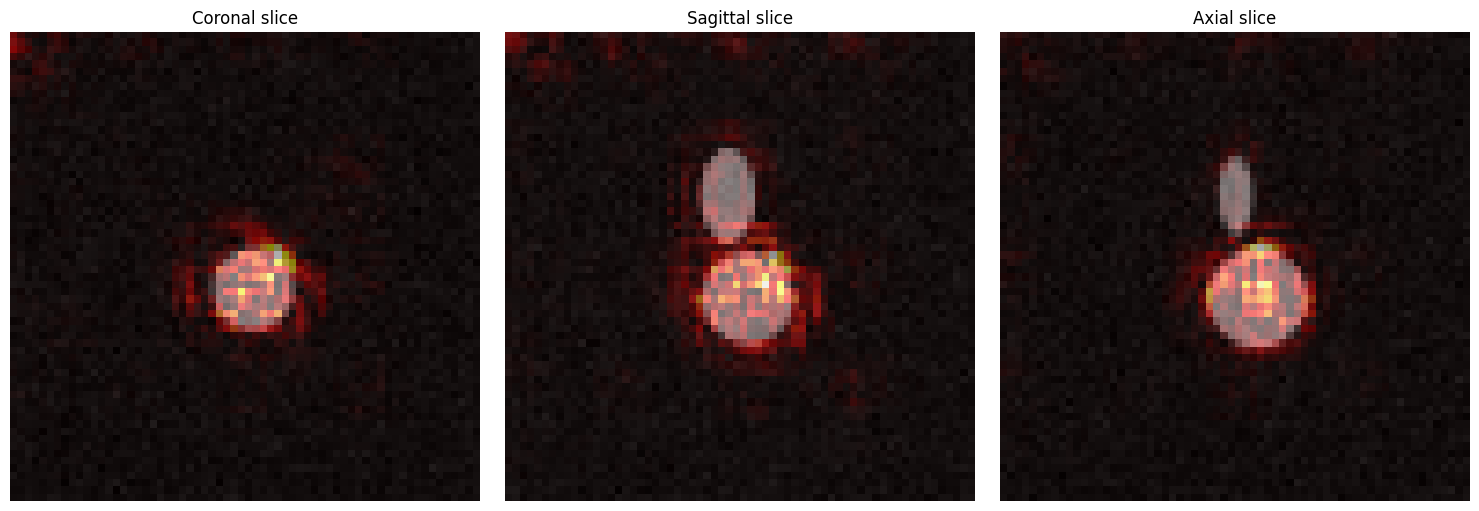

{'size': 15}
saliencies.shape (64, 64, 64)
original_images.shape (64, 64, 64)


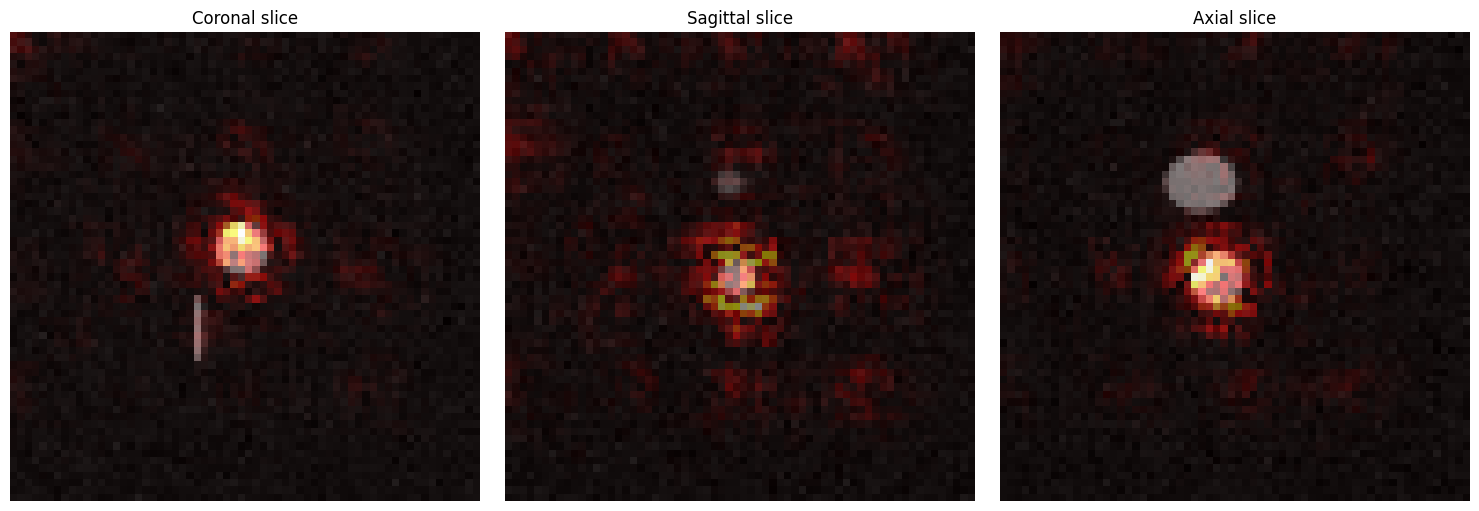

{'size': 12}
saliencies.shape (64, 64, 64)
original_images.shape (64, 64, 64)


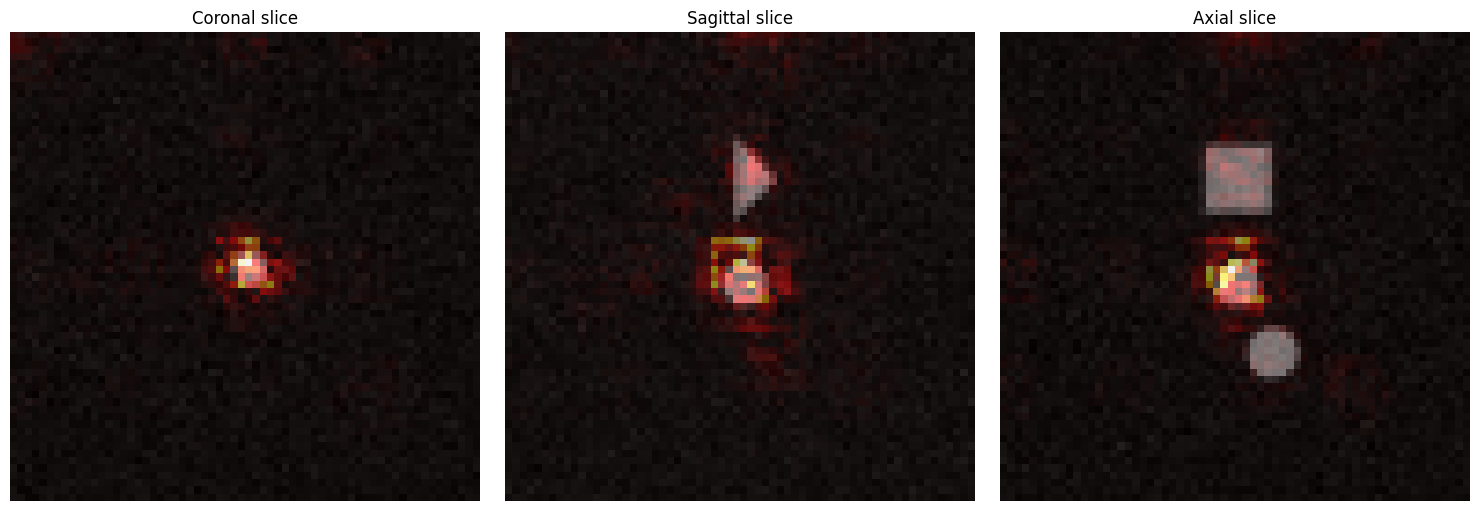

{'size': 22}
saliencies.shape (64, 64, 64)
original_images.shape (64, 64, 64)


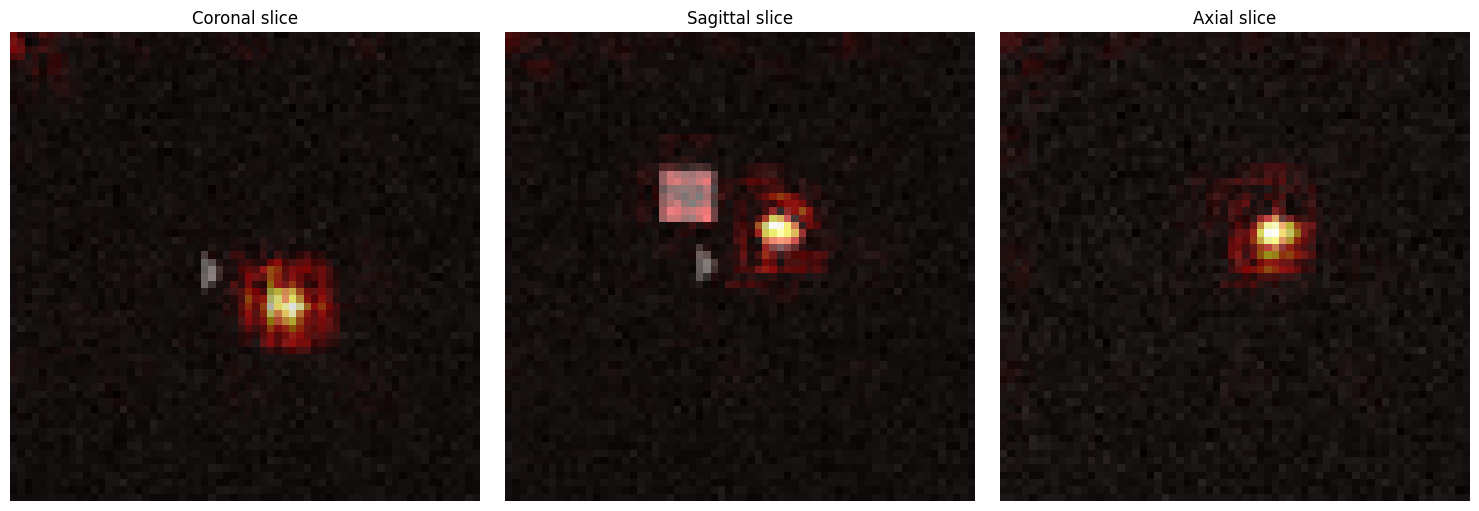

{'size': 14}
saliencies.shape (64, 64, 64)
original_images.shape (64, 64, 64)


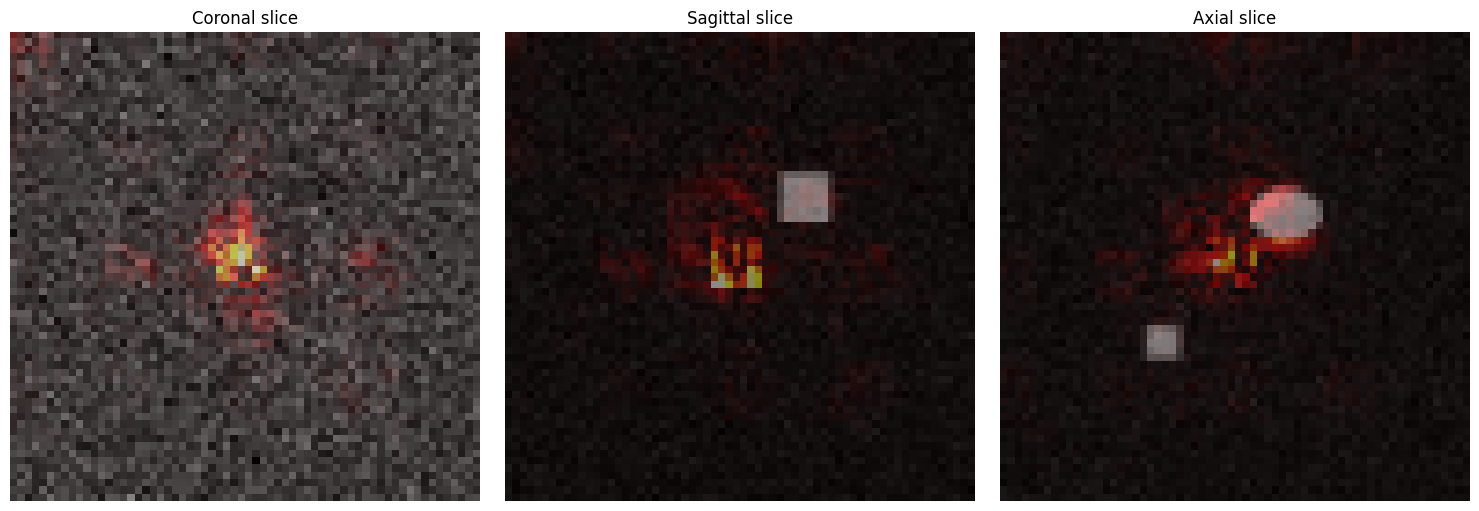

{'size': 22}
saliencies.shape (64, 64, 64)
original_images.shape (64, 64, 64)


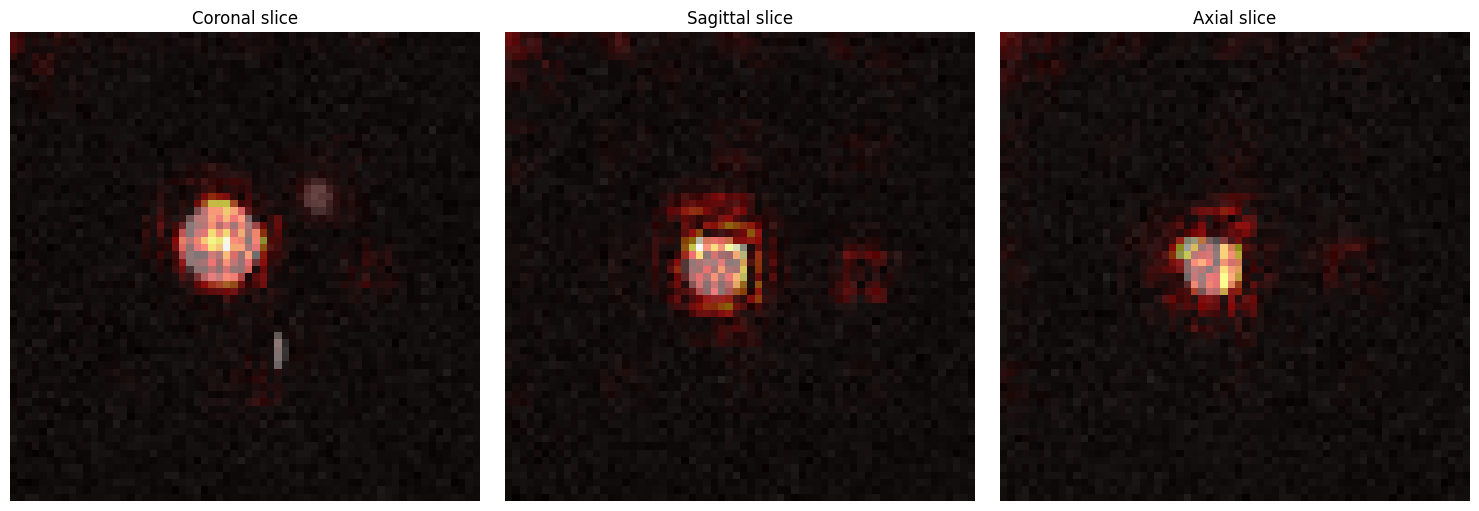

{'size': 26}
saliencies.shape (64, 64, 64)
original_images.shape (64, 64, 64)


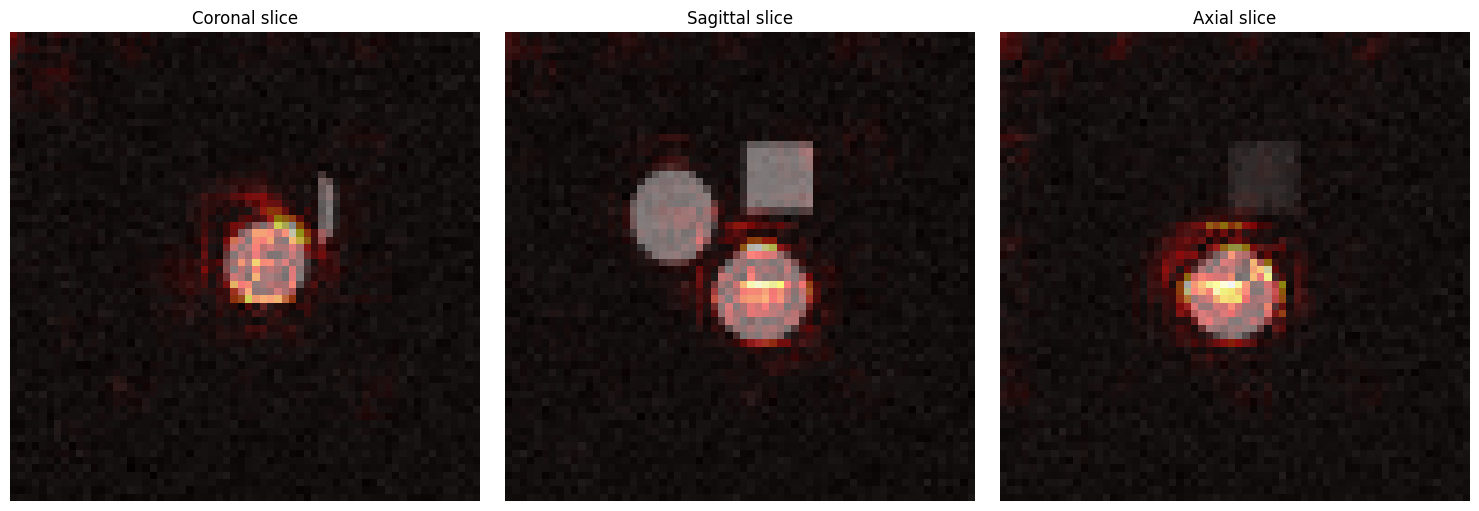

{'size': 17}
saliencies.shape (64, 64, 64)
original_images.shape (64, 64, 64)


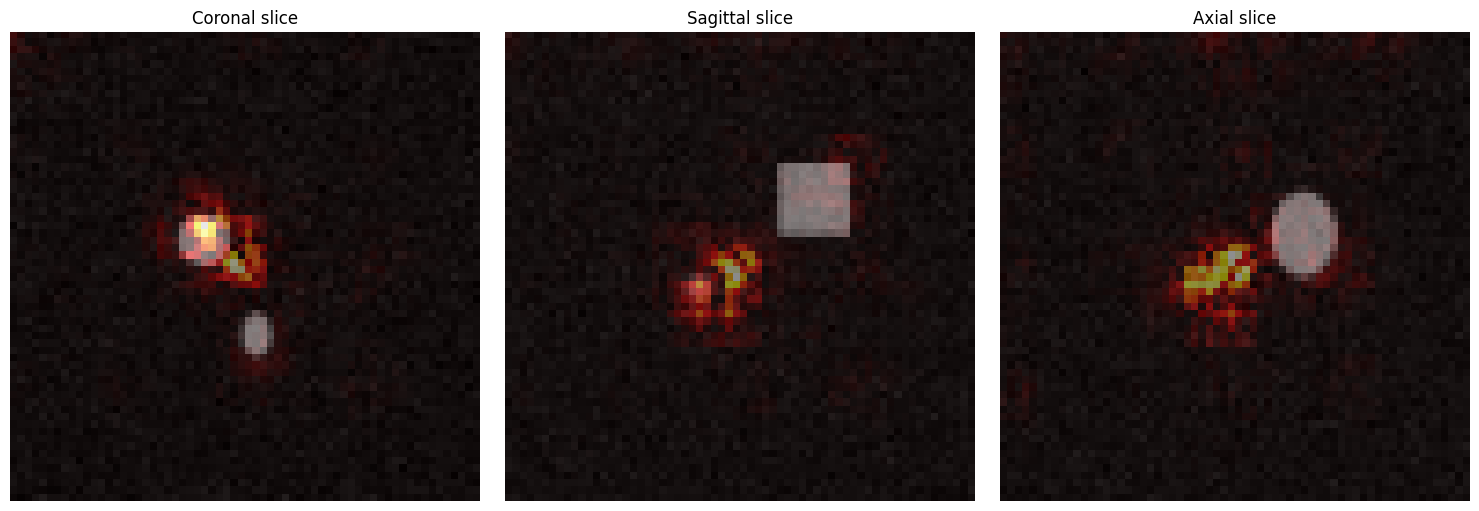

{'size': 28}
saliencies.shape (64, 64, 64)
original_images.shape (64, 64, 64)


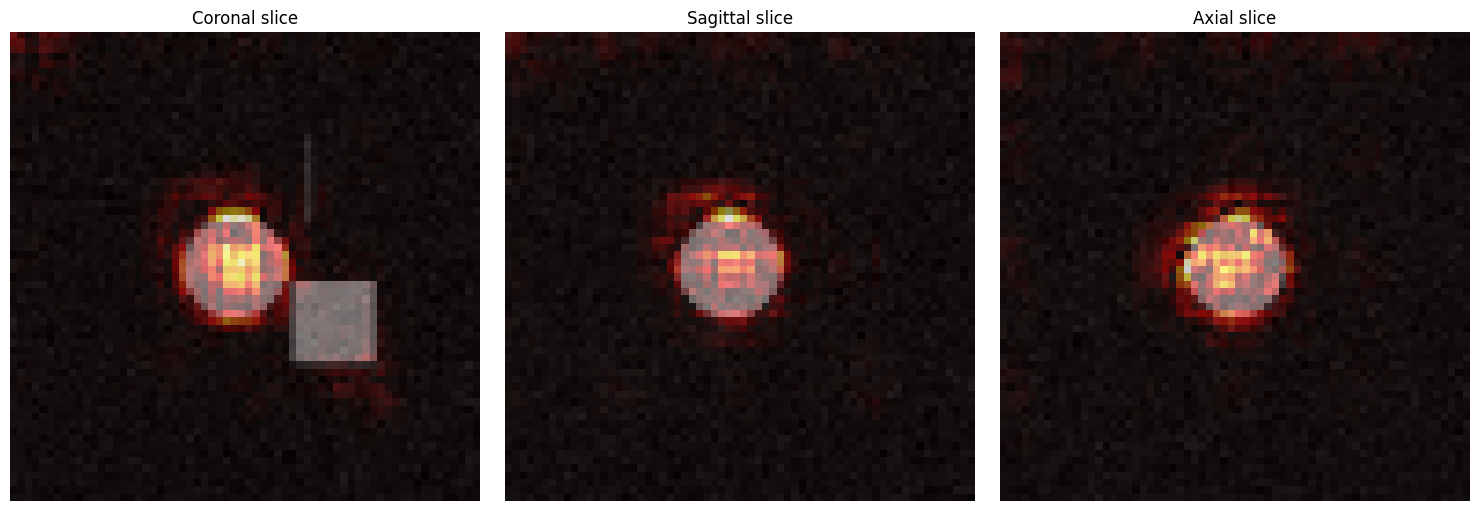

{'size': 27}
saliencies.shape (64, 64, 64)
original_images.shape (64, 64, 64)


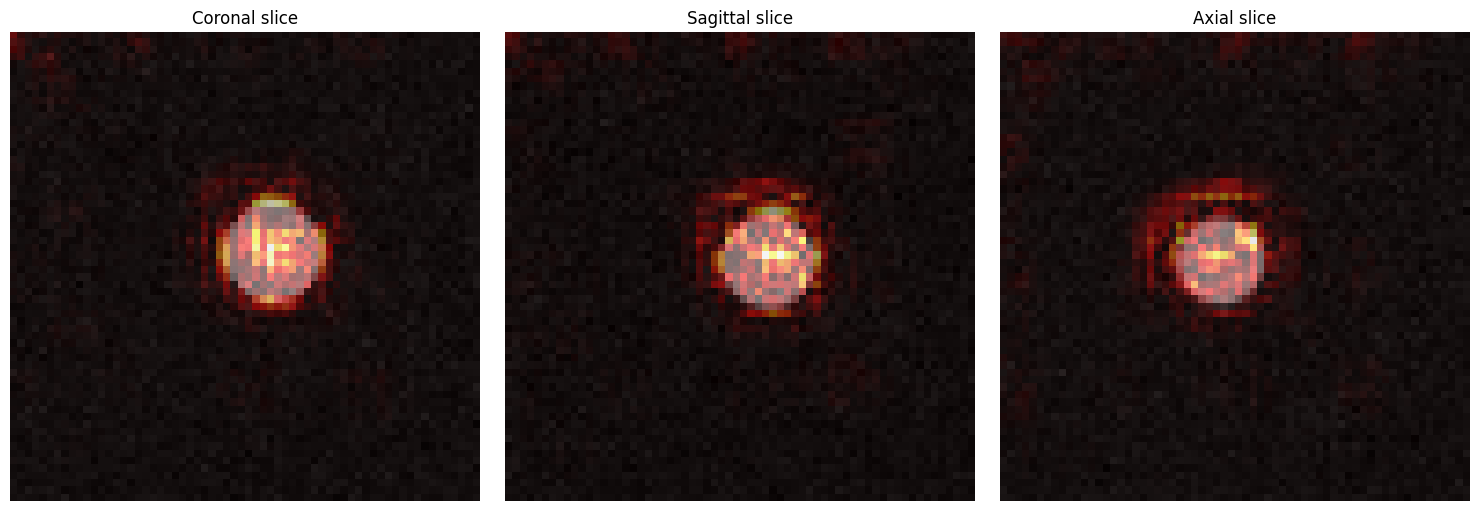

{'size': 16}
saliencies.shape (64, 64, 64)
original_images.shape (64, 64, 64)


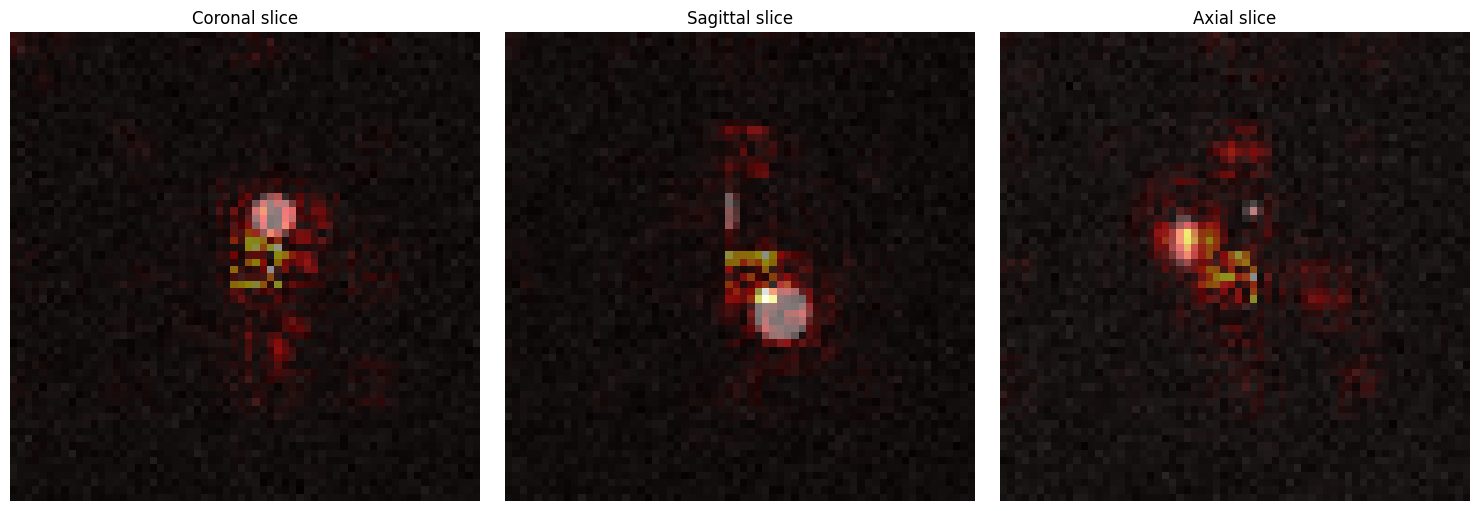

{'size': 19}
saliencies.shape (64, 64, 64)
original_images.shape (64, 64, 64)


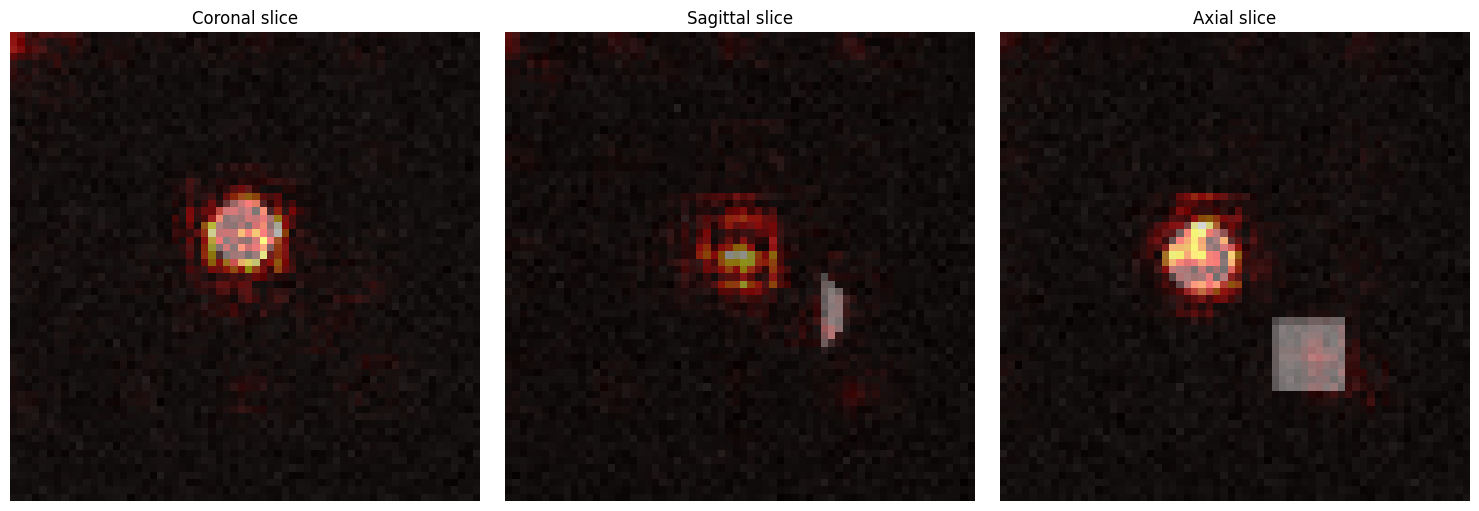

{'size': 22}
saliencies.shape (64, 64, 64)
original_images.shape (64, 64, 64)


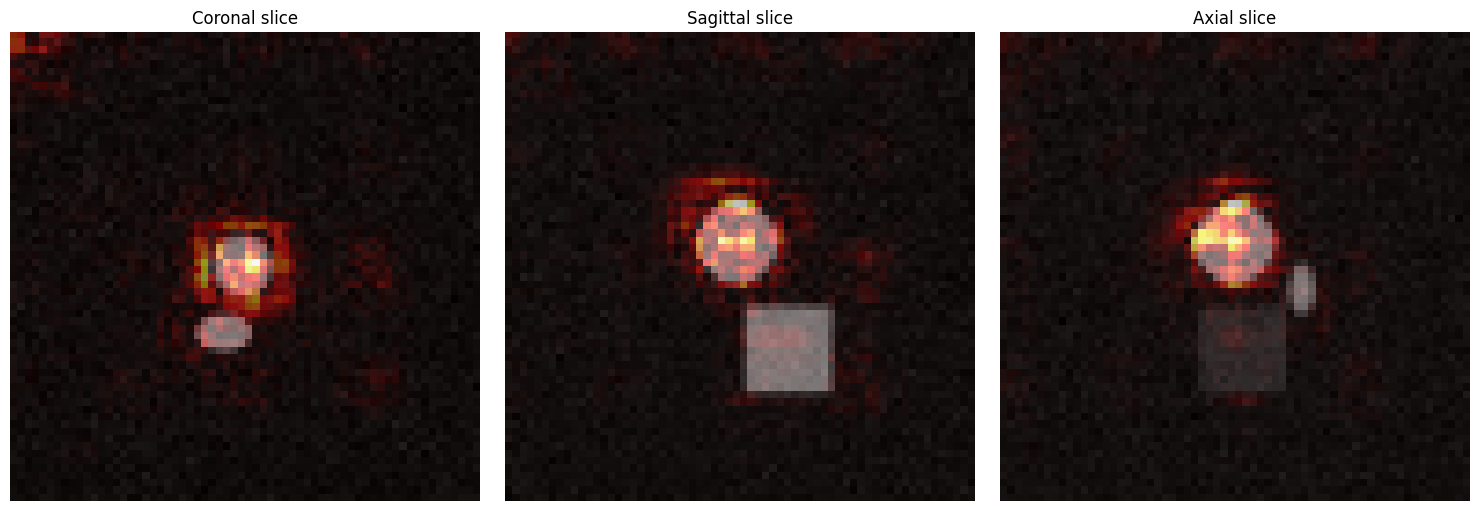

{'size': 16}
saliencies.shape (64, 64, 64)
original_images.shape (64, 64, 64)


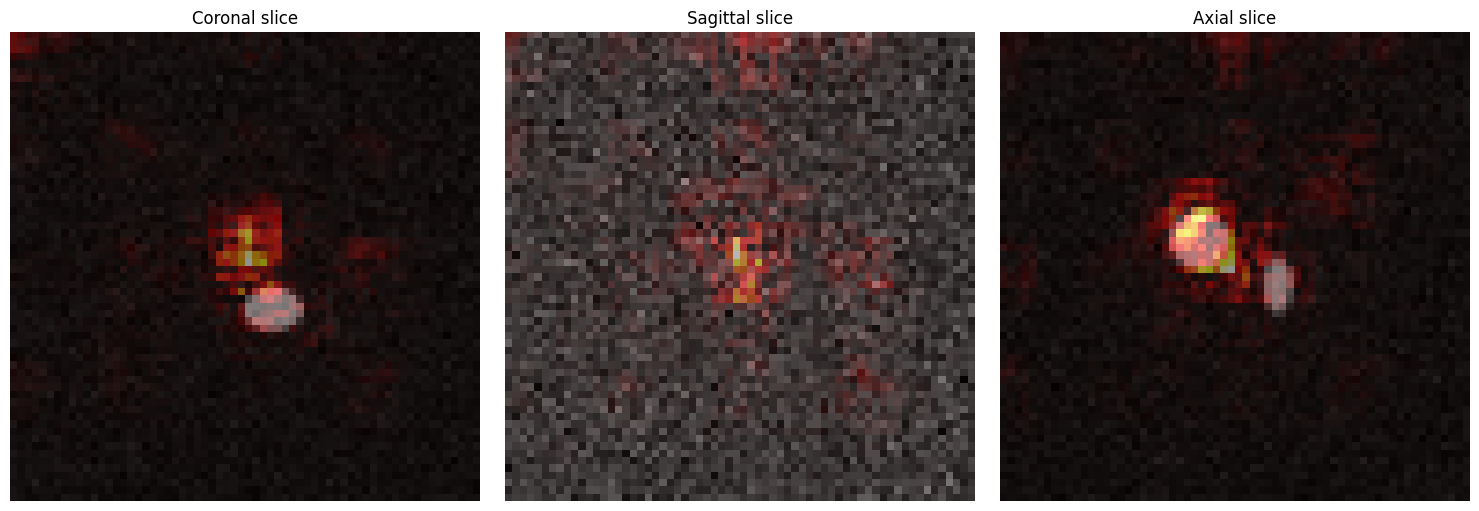

{'size': 28}
saliencies.shape (64, 64, 64)
original_images.shape (64, 64, 64)


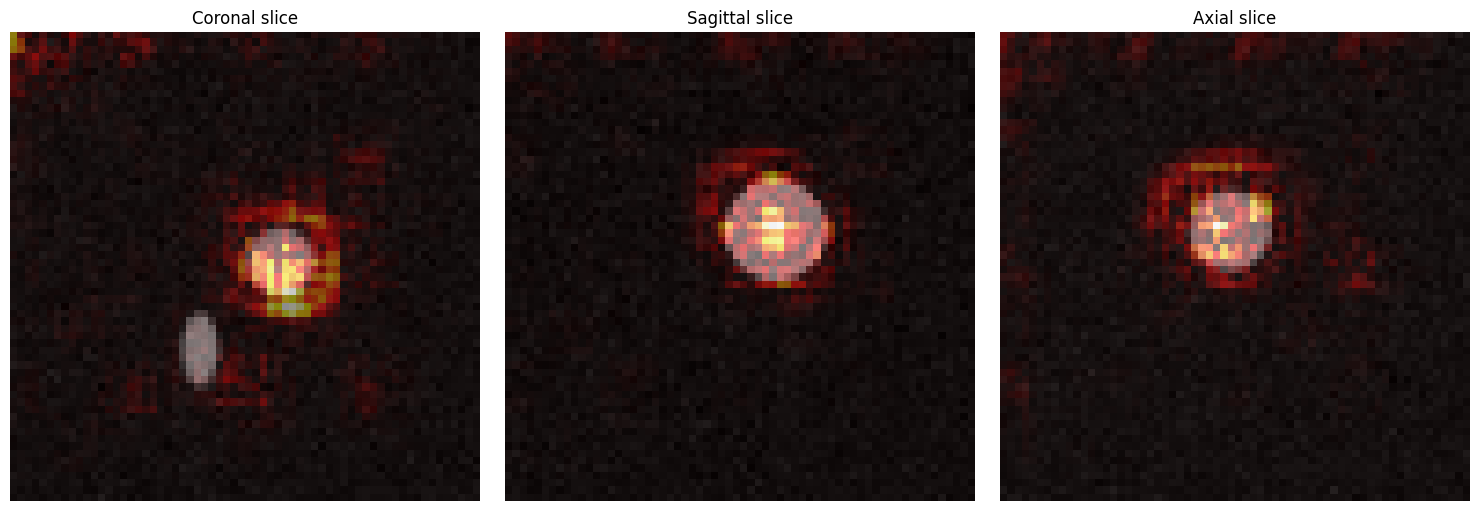

{'size': 10}
saliencies.shape (64, 64, 64)
original_images.shape (64, 64, 64)


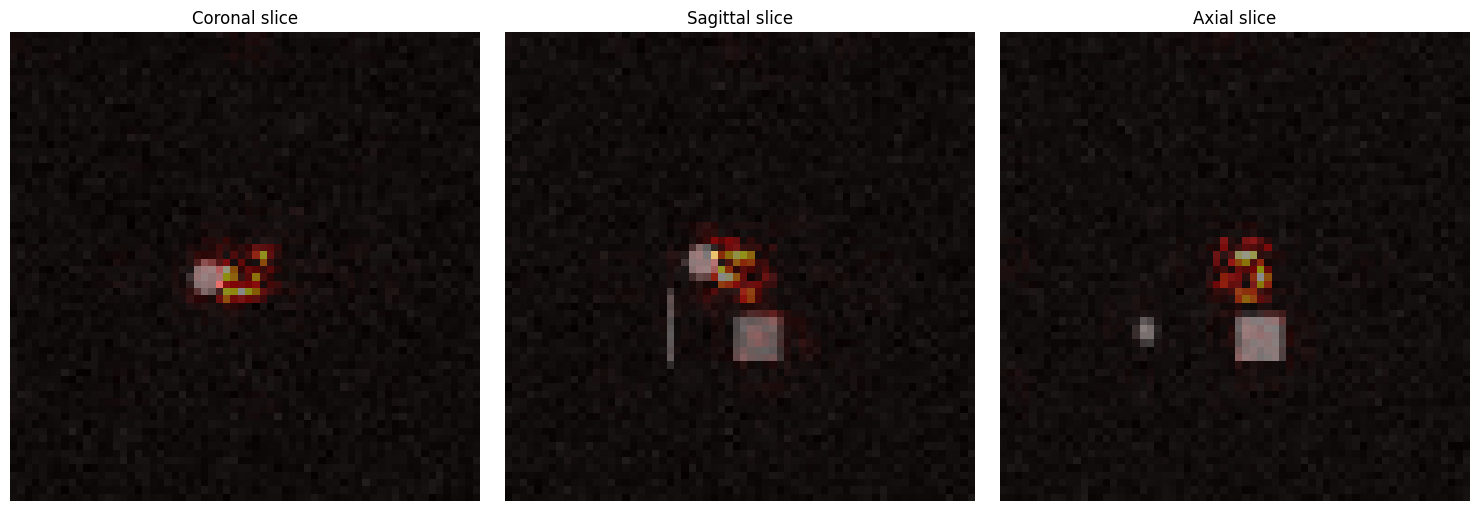

{'size': 10}
saliencies.shape (64, 64, 64)
original_images.shape (64, 64, 64)


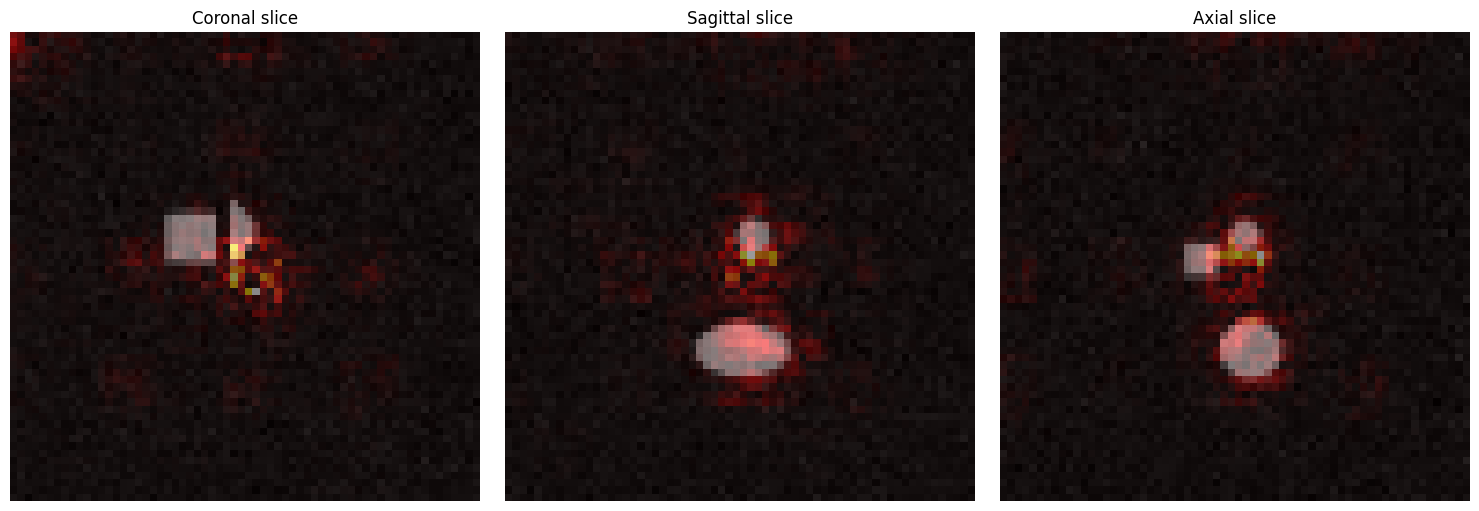

{'size': 14}
saliencies.shape (64, 64, 64)
original_images.shape (64, 64, 64)


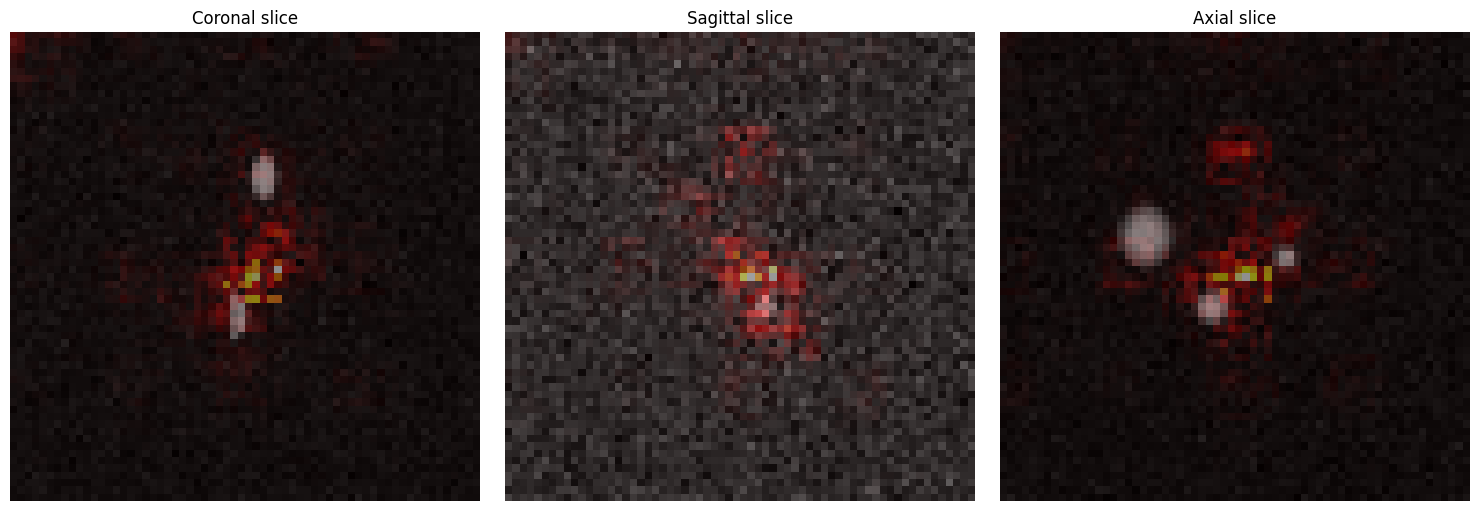

{'size': 24}
saliencies.shape (64, 64, 64)
original_images.shape (64, 64, 64)


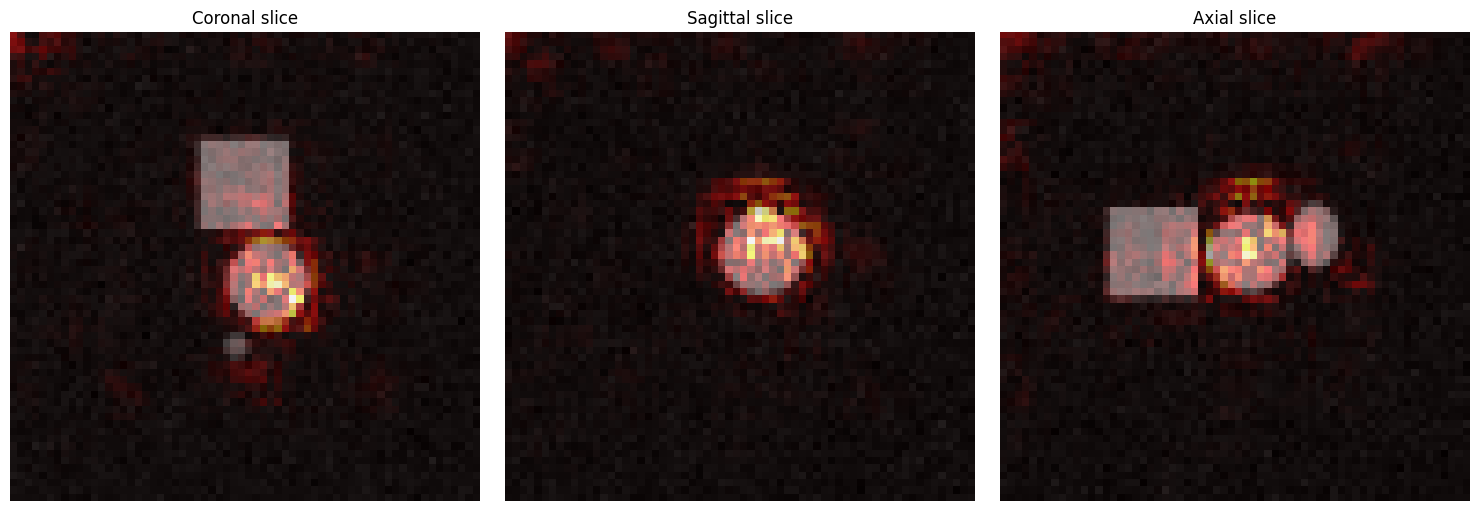

In [22]:
from src.XAI.VanillaSaliencyMedica3D import VanillaSaliency3D
saliency = VanillaSaliency3D(modelWrapper=fusion_model)
saliency.generate_map(index=0)

for i in range(0, 25):
    saliency.generate_map(index=i) 